<a href="https://colab.research.google.com/github/fakoliba/Credit-Card-Churn/blob/main/AML_Project_LearnerNotebook_FullCode.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Credit Card Users Churn Prediction

## Problem Statement

### Business Context

The Thera bank recently saw a steep decline in the number of users of their credit card, credit cards are a good source of income for banks because of different kinds of fees charged by the banks like annual fees, balance transfer fees, and cash advance fees, late payment fees, foreign transaction fees, and others. Some fees are charged to every user irrespective of usage, while others are charged under specified circumstances.

Customers’ leaving credit cards services would lead bank to loss, so the bank wants to analyze the data of customers and identify the customers who will leave their credit card services and reason for same – so that bank could improve upon those areas

You as a Data scientist at Thera bank need to come up with a classification model that will help the bank improve its services so that customers do not renounce their credit cards

### Data Description

* CLIENTNUM: Client number. Unique identifier for the customer holding the account
* Attrition_Flag: Internal event (customer activity) variable - if the account is closed then "Attrited Customer" else "Existing Customer"
* Customer_Age: Age in Years
* Gender: Gender of the account holder
* Dependent_count: Number of dependents
* Education_Level: Educational Qualification of the account holder - Graduate, High School, Unknown, Uneducated, College(refers to college student), Post-Graduate, Doctorate
* Marital_Status: Marital Status of the account holder
* Income_Category: Annual Income Category of the account holder
* Card_Category: Type of Card
* Months_on_book: Period of relationship with the bank (in months)
* Total_Relationship_Count: Total no. of products held by the customer
* Months_Inactive_12_mon: No. of months inactive in the last 12 months
* Contacts_Count_12_mon: No. of Contacts in the last 12 months
* Credit_Limit: Credit Limit on the Credit Card
* Total_Revolving_Bal: Total Revolving Balance on the Credit Card
* Avg_Open_To_Buy: Open to Buy Credit Line (Average of last 12 months)
* Total_Amt_Chng_Q4_Q1: Change in Transaction Amount (Q4 over Q1)
* Total_Trans_Amt: Total Transaction Amount (Last 12 months)
* Total_Trans_Ct: Total Transaction Count (Last 12 months)
* Total_Ct_Chng_Q4_Q1: Change in Transaction Count (Q4 over Q1)
* Avg_Utilization_Ratio: Average Card Utilization Ratio

#### What Is a Revolving Balance?

- If we don't pay the balance of the revolving credit account in full every month, the unpaid portion carries over to the next month. That's called a revolving balance


##### What is the Average Open to buy?

- 'Open to Buy' means the amount left on your credit card to use. Now, this column represents the average of this value for the last 12 months.

##### What is the Average utilization Ratio?

- The Avg_Utilization_Ratio represents how much of the available credit the customer spent. This is useful for calculating credit scores.


##### Relation b/w Avg_Open_To_Buy, Credit_Limit and Avg_Utilization_Ratio:

- ( Avg_Open_To_Buy / Credit_Limit ) + Avg_Utilization_Ratio = 1

### **Please read the instructions carefully before starting the project.**
This is a commented Jupyter IPython Notebook file in which all the instructions and tasks to be performed are mentioned.
* Blanks '_______' are provided in the notebook that
needs to be filled with an appropriate code to get the correct result. With every '_______' blank, there is a comment that briefly describes what needs to be filled in the blank space.
* Identify the task to be performed correctly, and only then proceed to write the required code.
* Fill the code wherever asked by the commented lines like "# write your code here" or "# complete the code". Running incomplete code may throw error.
* Please run the codes in a sequential manner from the beginning to avoid any unnecessary errors.
* Add the results/observations (wherever mentioned) derived from the analysis in the presentation and submit the same.


## Importing necessary libraries

In [ ]:
# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# To suppress scientific notations
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# Libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# To tune model, get different metric scores, and split data
from sklearn import metrics
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
)
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score

# To be used for data scaling and one hot encoding
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder

# To impute missing values
from sklearn.impute import SimpleImputer

# To oversample and undersample data
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# To do hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV

# To define maximum number of columns to be displayed in a dataframe
pd.set_option("display.max_columns", None)

# To supress scientific notations for a dataframe
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# To help with model building
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    AdaBoostClassifier,
    GradientBoostingClassifier,
    RandomForestClassifier,
    BaggingClassifier,
)
from xgboost import XGBClassifier

# To supress warnings
import warnings
warnings.filterwarnings("ignore")

**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again*.

## Loading the dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
data = pd.read_csv('/content/drive/MyDrive/class/data/BankChurners.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Data Overview

- Observations
- Sanity checks

In [ ]:
data.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.000,777,11914.000,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.000,864,7392.000,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.000,0,3418.000,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,NaN,Less than $40K,Blue,34,3,4,1,3313.000,2517,796.000,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.000,0,4716.000,2.175,816,28,2.500,0.000


In [ ]:
#checking the shape of data
print(f' There are {data.shape[0]} rows and {data.shape[1]} coumns')

 There are 10127 rows and 21 coumns


In [ ]:
#checking the data type
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           8608 non-null   object 
 6   Marital_Status            9378 non-null   object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

In [ ]:
#checking for duplicate values
data.duplicated().sum()

0

In [ ]:
#checking for for missing values
data.isnull().sum()

,0
CLIENTNUM,0
Attrition_Flag,0
Customer_Age,0
Gender,0
Dependent_count,0
Education_Level,1519
Marital_Status,749
Income_Category,0
Card_Category,0
Months_on_book,0


In [ ]:
#checking for duplicate values
data.duplicated().sum()

0

In [ ]:
#checking for statiscal summary of data
data.describe()

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,10127.000,10127.000,10127.000,10127.000,10127.000,10127.000,10127.000,10127.000,10127.000,10127.000,10127.000,10127.000,10127.000,10127.000,10127.000
mean,739177606.334,46.326,2.346,35.928,3.813,2.341,2.455,8631.954,1162.814,7469.140,0.760,4404.086,64.859,0.712,0.275
std,36903783.450,8.017,1.299,7.986,1.554,1.011,1.106,9088.777,814.987,9090.685,0.219,3397.129,23.473,0.238,0.276
min,708082083.000,26.000,0.000,13.000,1.000,0.000,0.000,1438.300,0.000,3.000,0.000,510.000,10.000,0.000,0.000
25%,713036770.500,41.000,1.000,31.000,3.000,2.000,2.000,2555.000,359.000,1324.500,0.631,2155.500,45.000,0.582,0.023
50%,717926358.000,46.000,2.000,36.000,4.000,2.000,2.000,4549.000,1276.000,3474.000,0.736,3899.000,67.000,0.702,0.176
75%,773143533.000,52.000,3.000,40.000,5.000,3.000,3.000,11067.500,1784.000,9859.000,0.859,4741.000,81.000,0.818,0.503
max,828343083.000,73.000,5.000,56.000,6.000,6.000,6.000,34516.000,2517.000,34516.000,3.397,18484.000,139.000,3.714,0.999


In [ ]:
data.describe(include='object').T

,count,unique,top,freq
Attrition_Flag,10127,2,Existing Customer,8500
Gender,10127,2,F,5358
Education_Level,8608,6,Graduate,3128
Marital_Status,9378,3,Married,4687
Income_Category,10127,6,Less than $40K,3561
Card_Category,10127,4,Blue,9436


In [ ]:
# CLIENTNUM consists of uniques ID for clients adropping it
data.drop('CLIENTNUM',axis=1,inplace=True)


In [ ]:
#Encoding exisiting and attributed to customers to 0 and 1 for analysis
data['Attrition_Flag'] = data['Attrition_Flag'].map({'Existing Customer':0,'Attrited Customer':1})

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**:

1. How is the total transaction amount distributed?
2. What is the distribution of the level of education of customers?
3. What is the distribution of the level of income of customers?
4. How does the change in transaction amount between Q4 and Q1 (`total_ct_change_Q4_Q1`) vary by the customer's account status (`Attrition_Flag`)?
5. How does the number of months a customer was inactive in the last 12 months (`Months_Inactive_12_mon`) vary by the customer's account status (`Attrition_Flag`)?
6. What are the attributes that have a strong correlation with each other?



#### The below functions need to be defined to carry out the Exploratory Data Analysis.

In [ ]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [ ]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

In [ ]:
# function to plot stacked bar chart

def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 1, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

In [ ]:
### Function to plot distributions

def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

# Univariate analysis

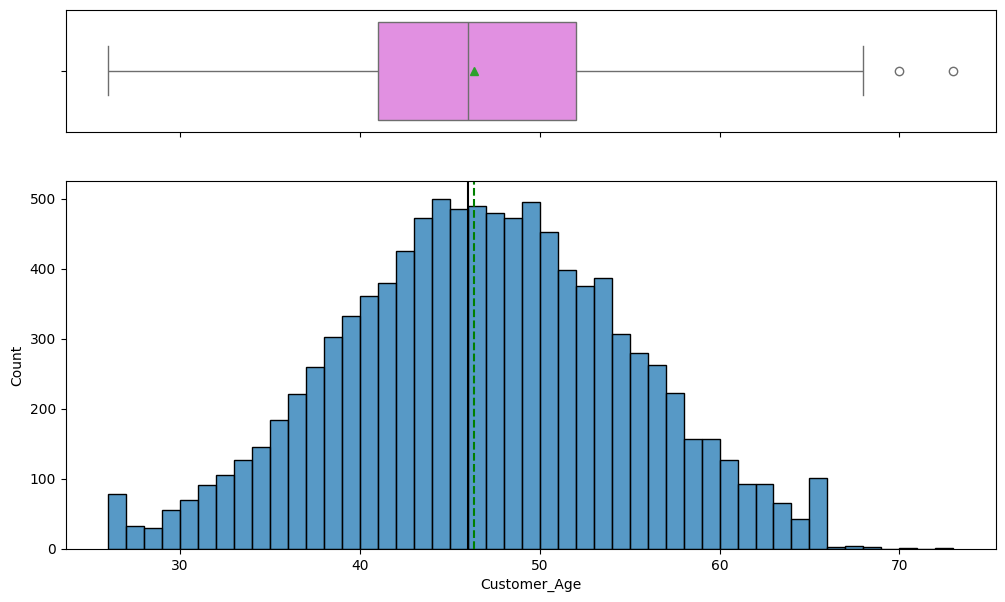

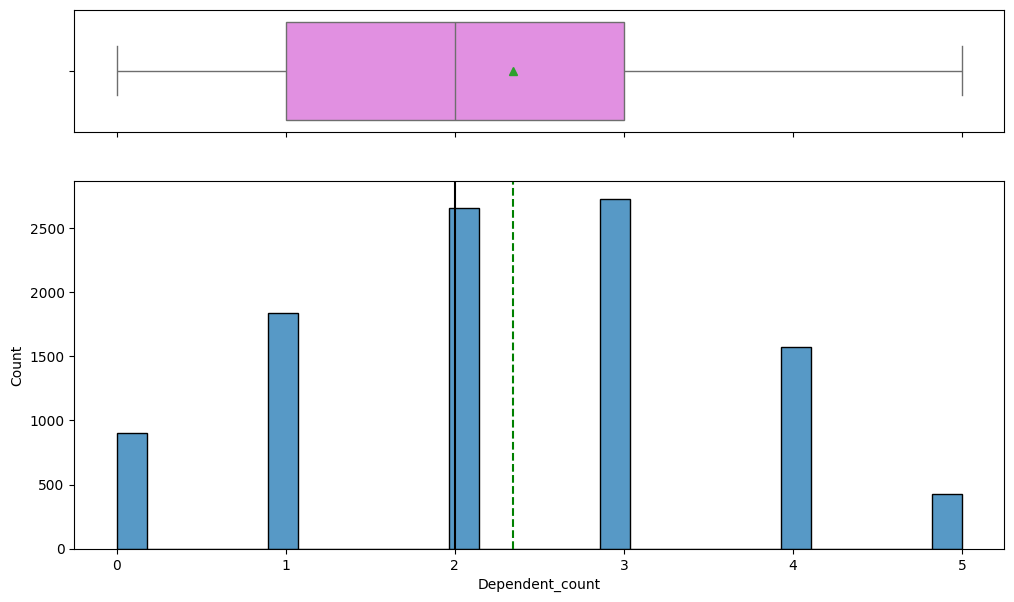

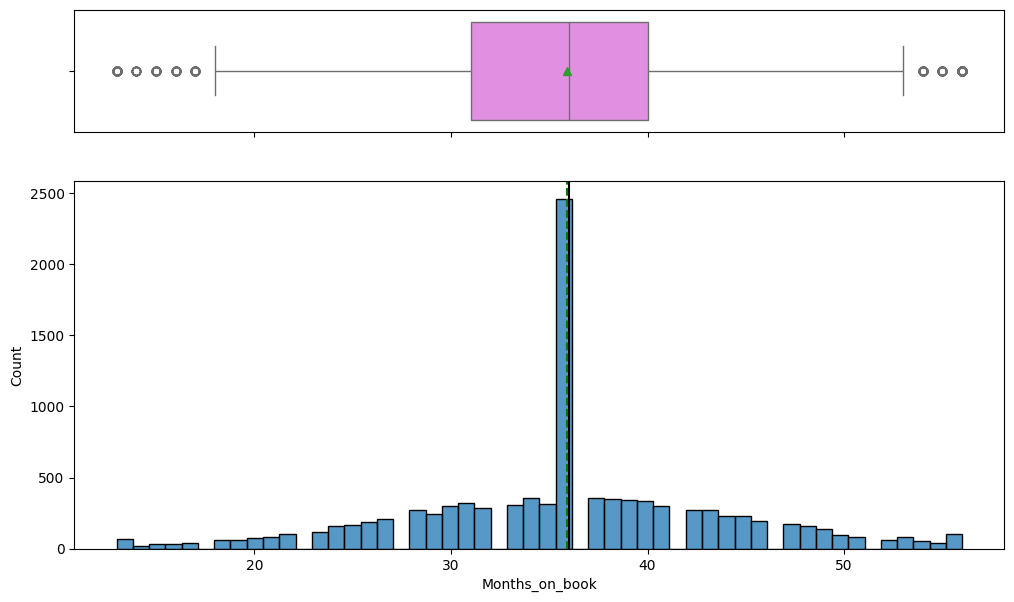

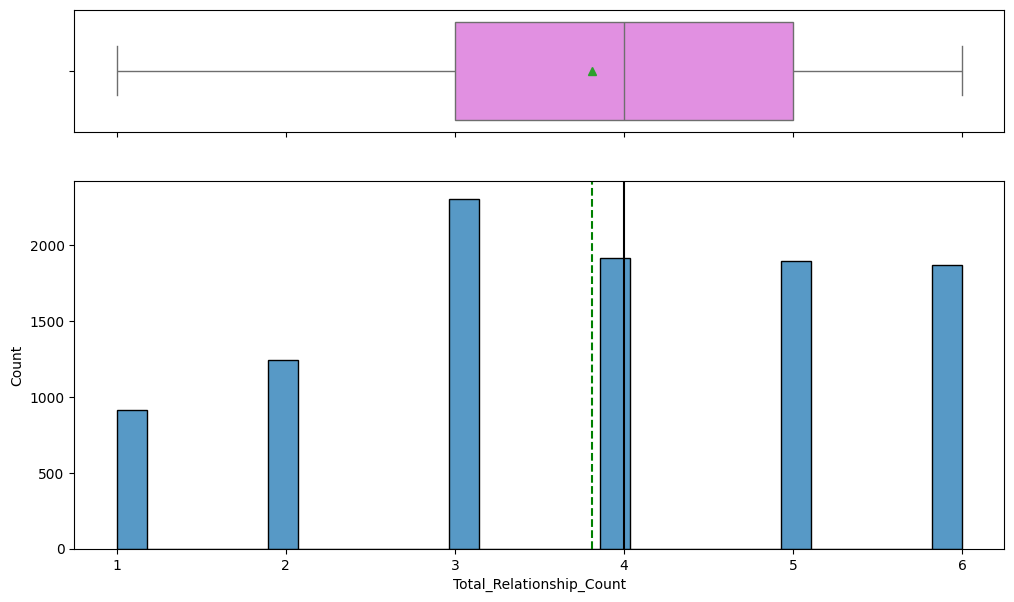

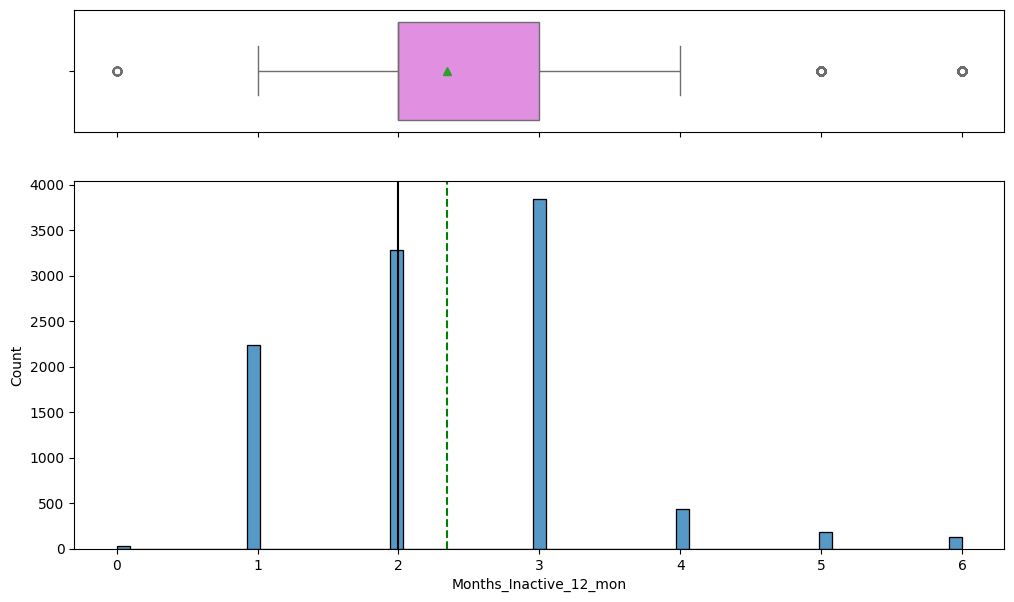

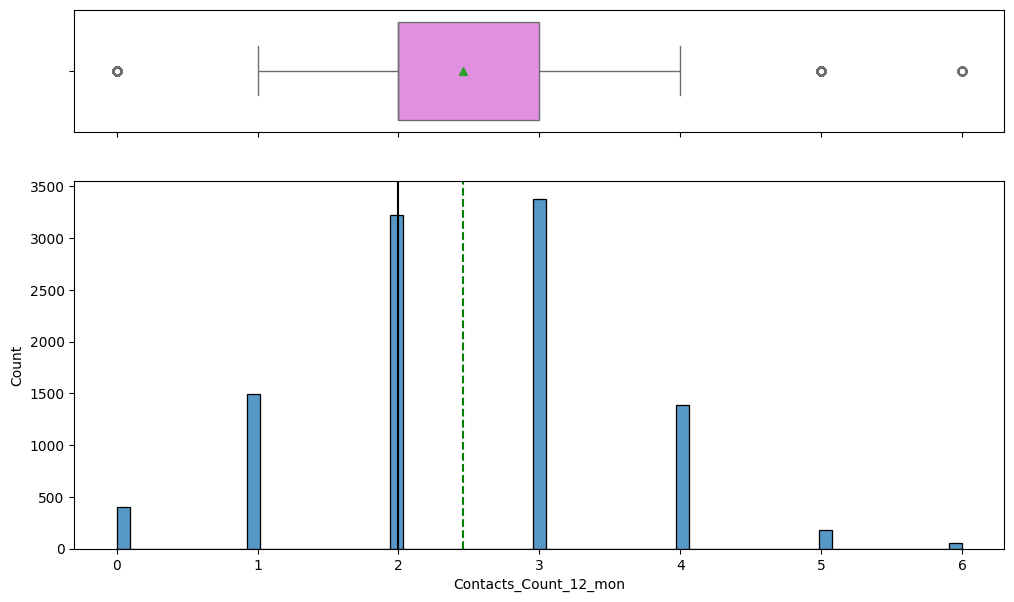

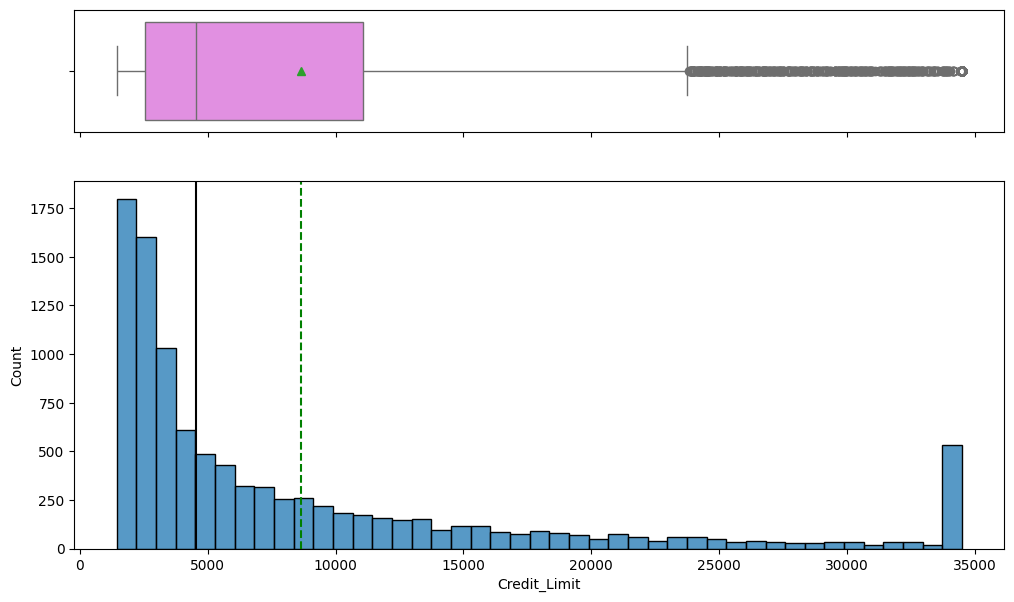

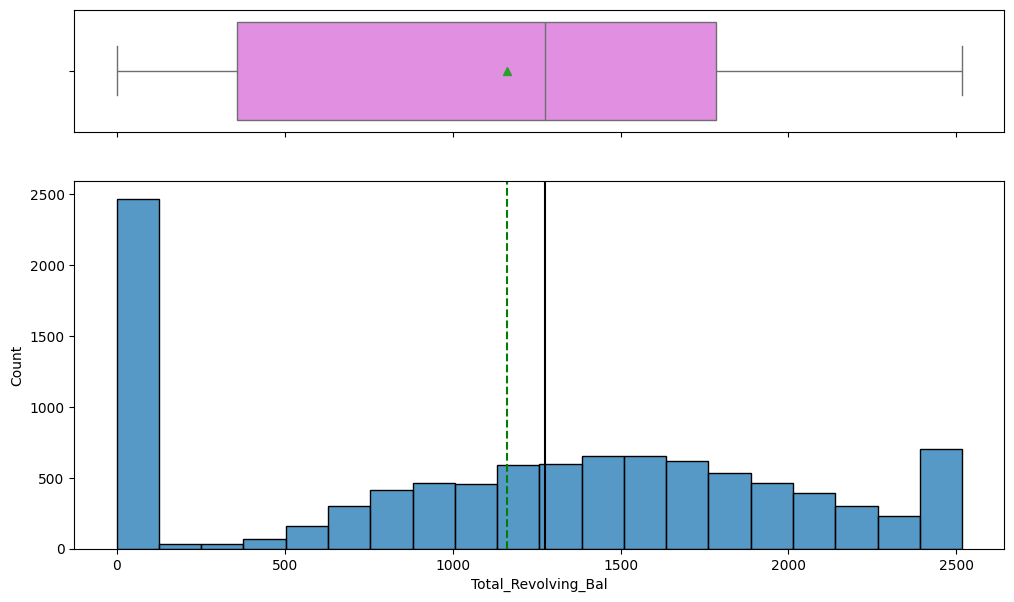

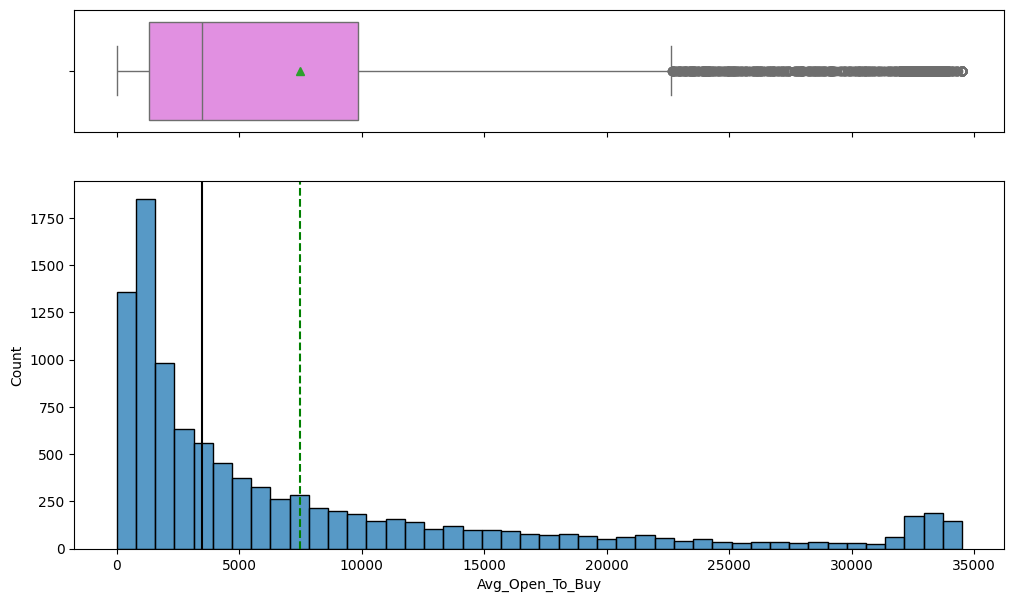

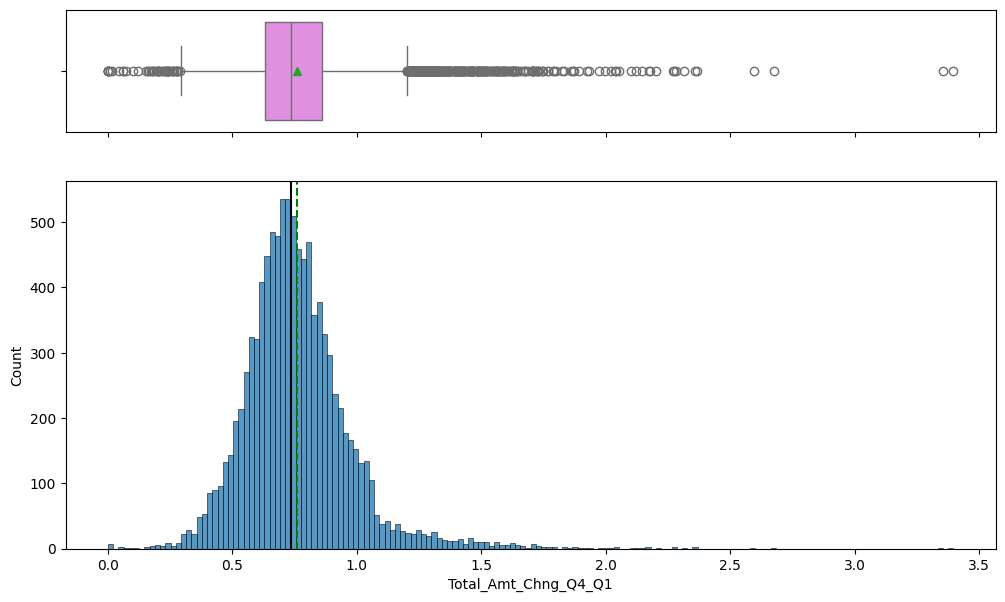

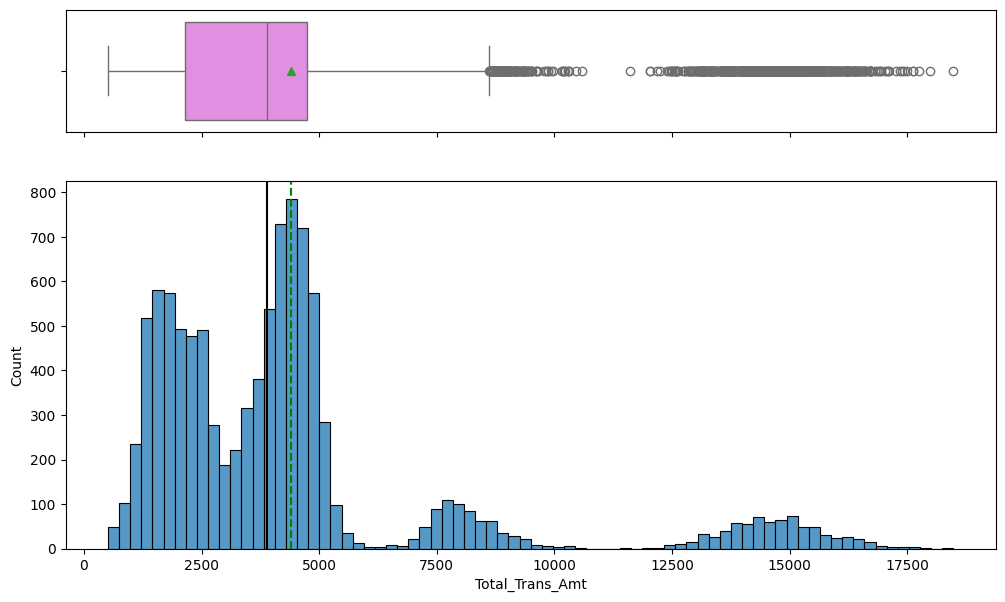

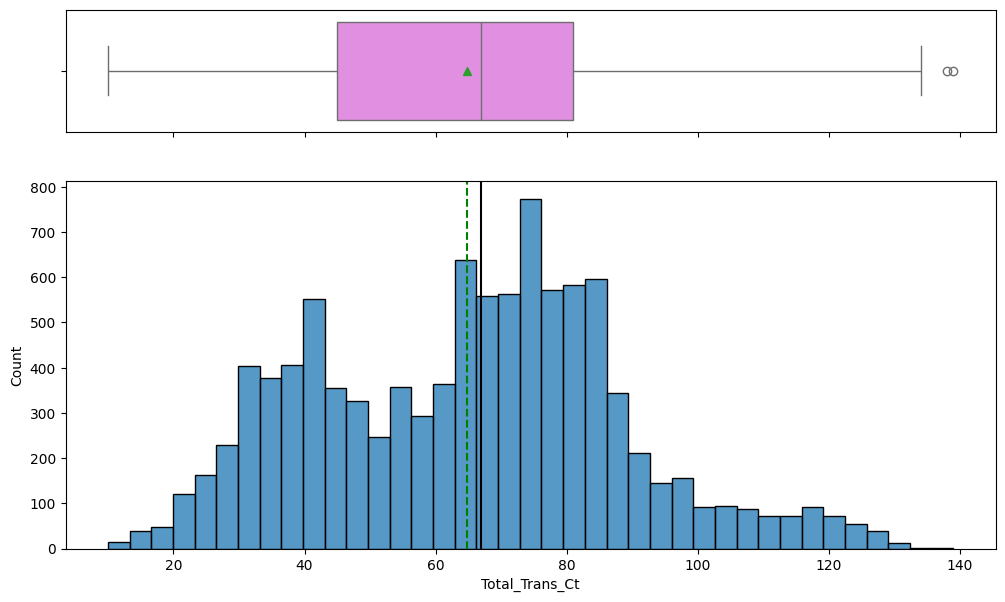

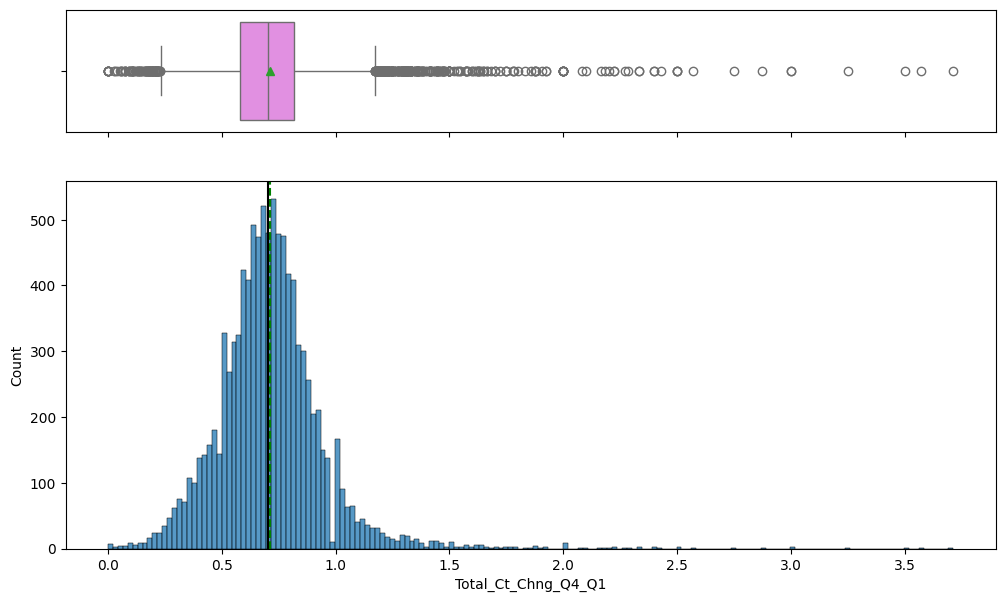

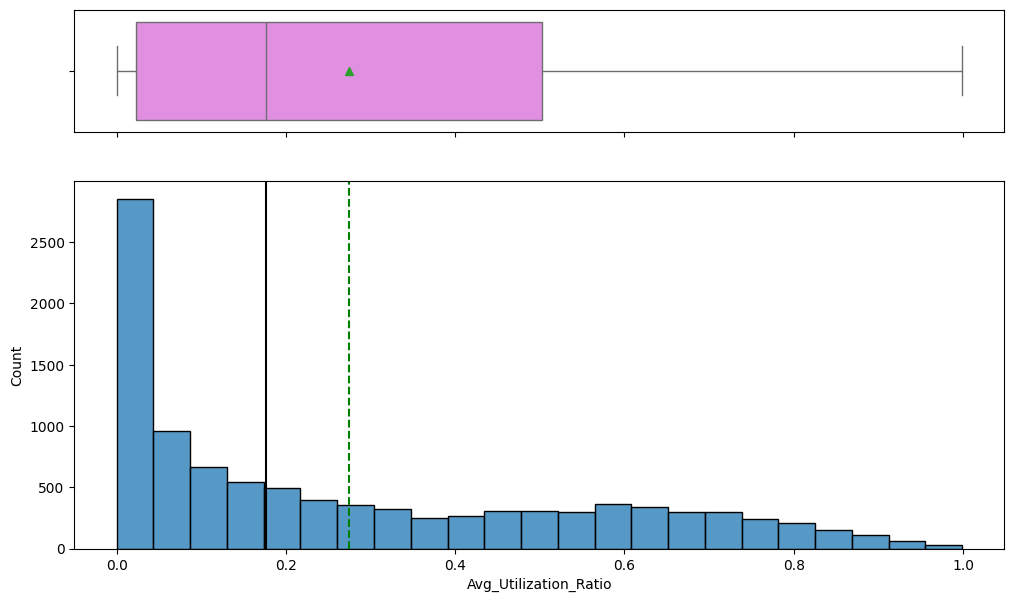

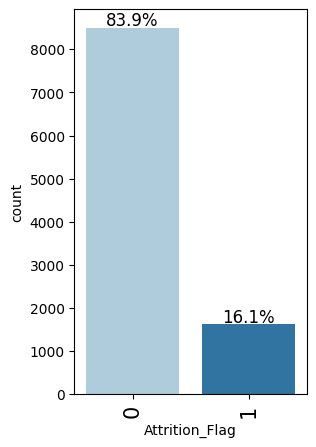

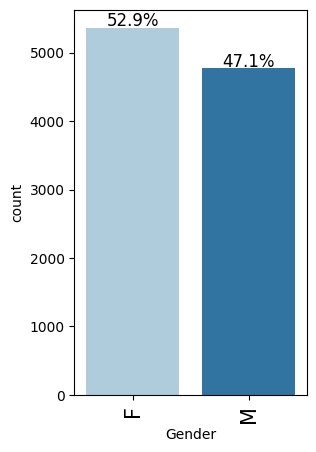

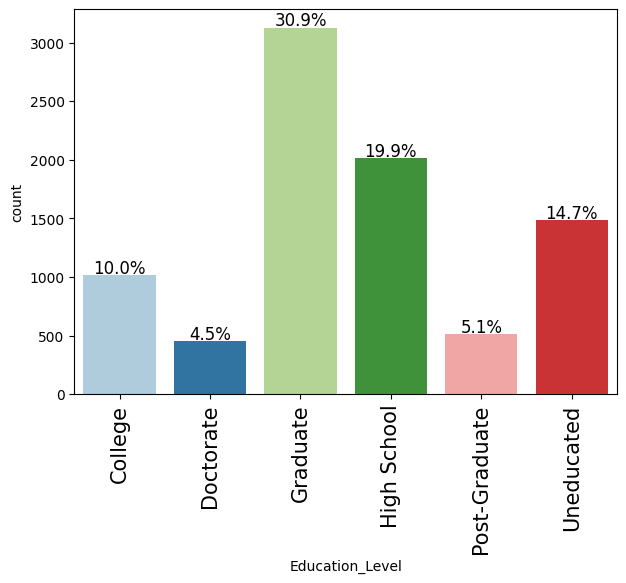

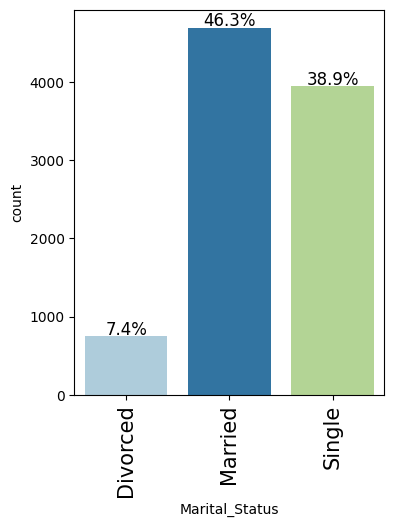

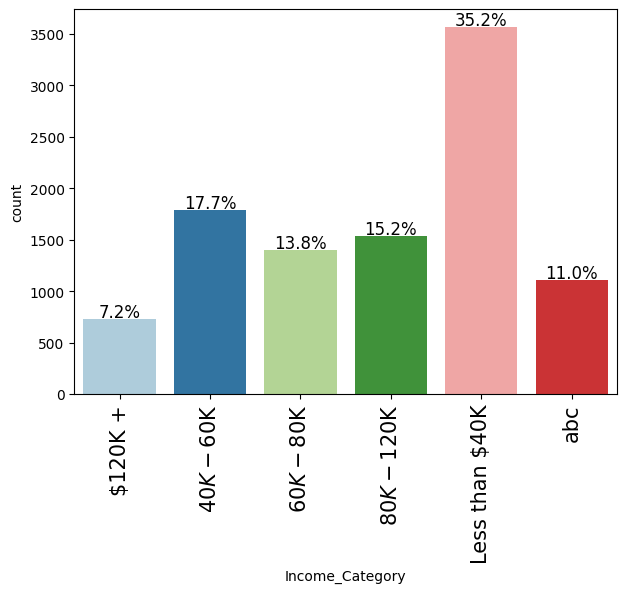

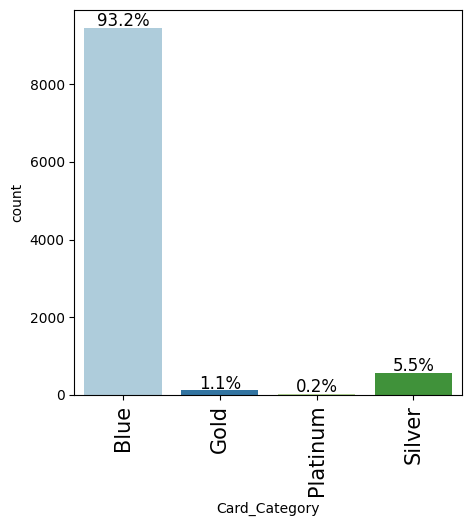

In [ ]:
#  univariate analysis of data

# Univariate Analysis for 'Customer_Age'
histogram_boxplot(data, 'Customer_Age')
# Univariate Analysis for 'Dependent_count'
histogram_boxplot(data, 'Dependent_count')
# Univariate Analysis for 'Months_on_book'
histogram_boxplot(data, 'Months_on_book')
# Univariate Analysis for 'Total_Relationship_Count'
histogram_boxplot(data, 'Total_Relationship_Count')
# Univariate Analysis for 'Months_Inactive_12_mon'
histogram_boxplot(data, 'Months_Inactive_12_mon')
# Univariate Analysis for 'Contacts_Count_12_mon'
histogram_boxplot(data, 'Contacts_Count_12_mon')
# Univariate Analysis for 'Credit_Limit'
histogram_boxplot(data, 'Credit_Limit')
# Univariate Analysis for 'Total_Revolving_Bal'
histogram_boxplot(data, 'Total_Revolving_Bal')
# Univariate Analysis for 'Avg_Open_To_Buy'
histogram_boxplot(data, 'Avg_Open_To_Buy')
# Univariate Analysis for 'Total_Amt_Chng_Q4_Q1'
histogram_boxplot(data, 'Total_Amt_Chng_Q4_Q1')
# Univariate Analysis for 'Total_Trans_Amt'
histogram_boxplot(data, 'Total_Trans_Amt')
# Univariate Analysis for 'Total_Trans_Ct'
histogram_boxplot(data, 'Total_Trans_Ct')
# Univariate Analysis for 'Total_Ct_Chng_Q4_Q1'
histogram_boxplot(data, 'Total_Ct_Chng_Q4_Q1')
# Univariate Analysis for 'Avg_Utilization_Ratio'
histogram_boxplot(data, 'Avg_Utilization_Ratio')

# Univariate Analysis for 'Attrition_Flag'
labeled_barplot(data, 'Attrition_Flag', perc=True)

# Univariate Analysis for 'Gender'
labeled_barplot(data, 'Gender', perc=True)

# Univariate Analysis for 'Education_Level'
labeled_barplot(data, 'Education_Level', perc=True)

# Univariate Analysis for 'Marital_Status'
labeled_barplot(data, 'Marital_Status', perc=True)

# Univariate Analysis for 'Income_Category'
labeled_barplot(data, 'Income_Category', perc=True)

# Univariate Analysis for 'Card_Category'
labeled_barplot(data, 'Card_Category', perc=True)


In [ ]:

# Insights from Univariate Analysis:

# 1. Customer Age:
#   - Most customers are between 40-60 years old.
#   - The distribution is slightly right-skewed.

# 2. Dependent Count:
#   - Most customers have 2 or fewer dependents.
#   - The distribution is right-skewed, with a few customers having a higher number of dependents.

# 3. Months on Book:
#   - The duration of customer relationships with the bank varies significantly.
#   - The distribution is slightly right-skewed.

# 4. Total Relationship Count:
#   - Most customers hold 3 or fewer products.
#   - The distribution is right-skewed.

# 5. Months Inactive 12 Months:
#   - Most customers were inactive for 1-2 months.
#   - The distribution is right-skewed.

# 6. Contacts Count 12 Months:
#   - Most customers contacted the bank 2-3 times.
#   - The distribution is right-skewed.

# 7. Credit Limit:
#   - The distribution is right-skewed, with a few customers having very high credit limits.

# 8. Total Revolving Balance:
#   - The distribution is right-skewed.

# 9. Avg Open To Buy:
#   - The distribution is right-skewed.

# 10. Total Amt Chng Q4 Q1:
#   - The distribution is relatively normal, centered around 0.

# 11. Total Trans Amt:
#   - The distribution is right-skewed.

# 12. Total Trans Ct:
#   - The distribution is right-skewed.

# 13. Total Ct Chng Q4 Q1:
#   - The distribution is relatively normal, centered around 0.

# 14. Avg Utilization Ratio:
#   - The distribution is right-skewed.

# 15. Attrition Flag:
#   - The majority of customers are existing customers (around 84%).
#   - Attrition (customer leaving) is a smaller percentage (around 16%).

# 16. Gender:
#   - The dataset shows a slightly higher number of female customers compared to male customers.

# 17. Education Level:
#   - Graduate and High School are the most common education levels among customers.

# 18. Marital Status:
#   - Married customers are the most common category.

# 19. Income Category:
#   - The most common income category is Less than $40K.

# 20. Card Category:
#   - Most customers have a Blue Card.


#


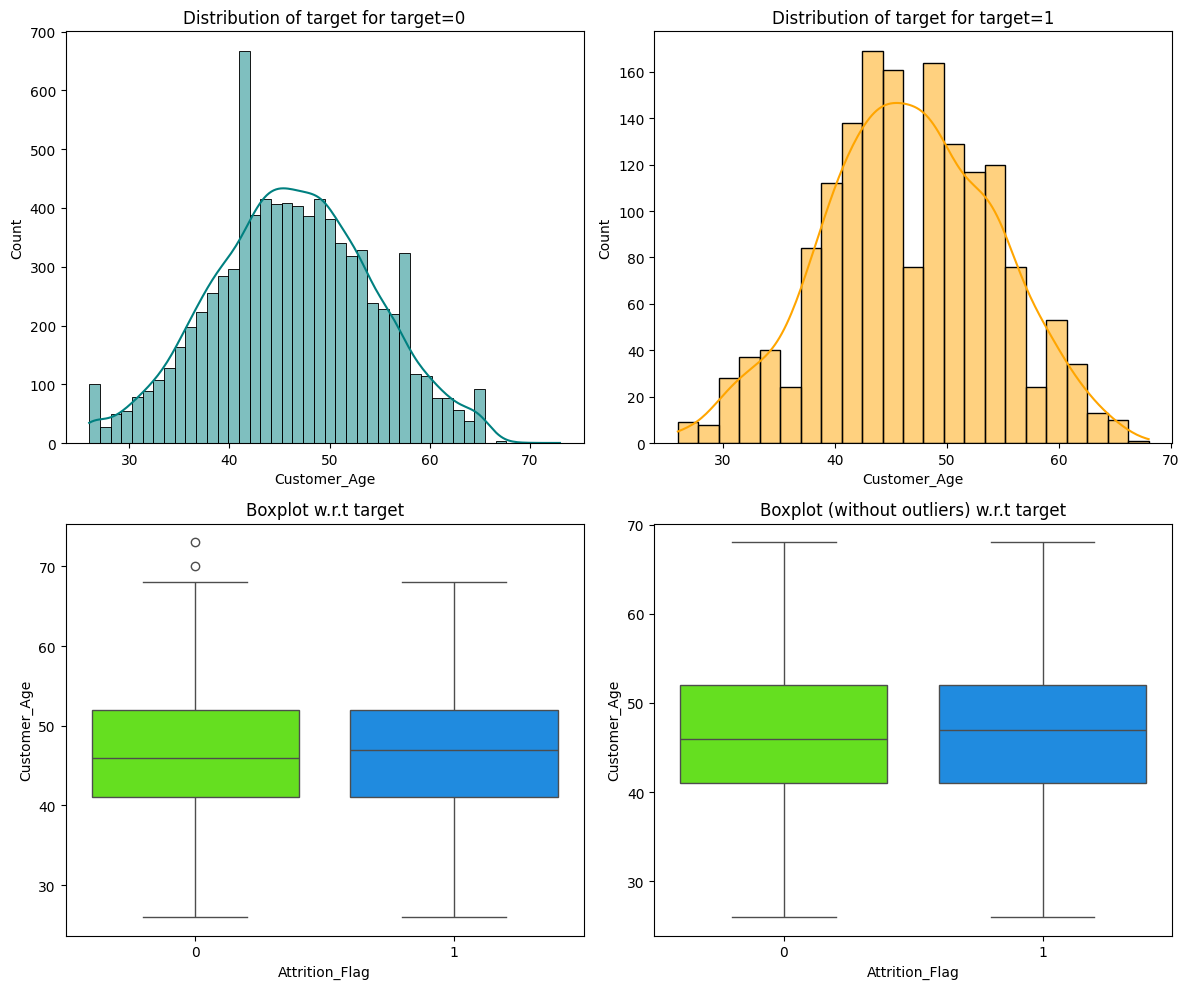

Attrition_Flag     0     1    All
Gender                           
All             8500  1627  10127
F               4428   930   5358
M               4072   697   4769
------------------------------------------------------------------------------------------------------------------------


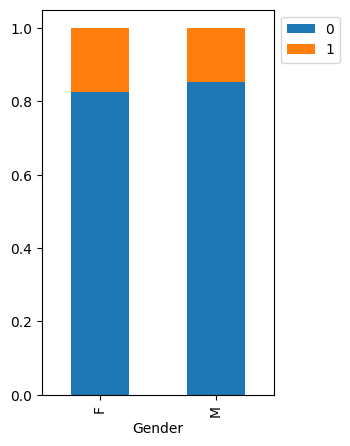

Attrition_Flag      0     1   All
Education_Level                  
All              7237  1371  8608
Graduate         2641   487  3128
High School      1707   306  2013
Uneducated       1250   237  1487
College           859   154  1013
Doctorate         356    95   451
Post-Graduate     424    92   516
------------------------------------------------------------------------------------------------------------------------


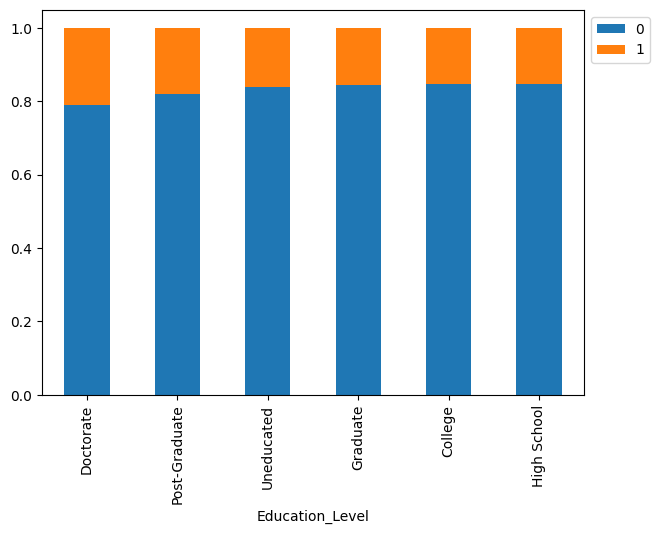

Attrition_Flag     0     1   All
Marital_Status                  
All             7880  1498  9378
Married         3978   709  4687
Single          3275   668  3943
Divorced         627   121   748
------------------------------------------------------------------------------------------------------------------------


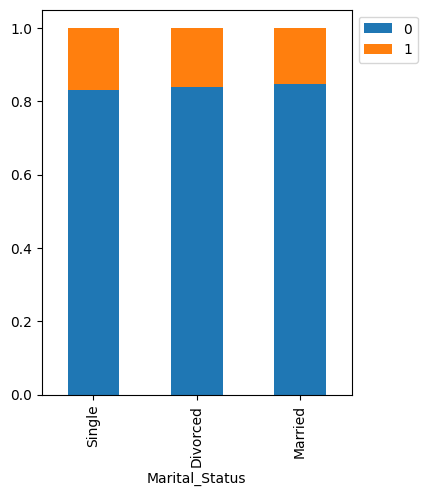

Attrition_Flag      0     1    All
Income_Category                   
All              8500  1627  10127
Less than $40K   2949   612   3561
$40K - $60K      1519   271   1790
$80K - $120K     1293   242   1535
$60K - $80K      1213   189   1402
abc               925   187   1112
$120K +           601   126    727
------------------------------------------------------------------------------------------------------------------------


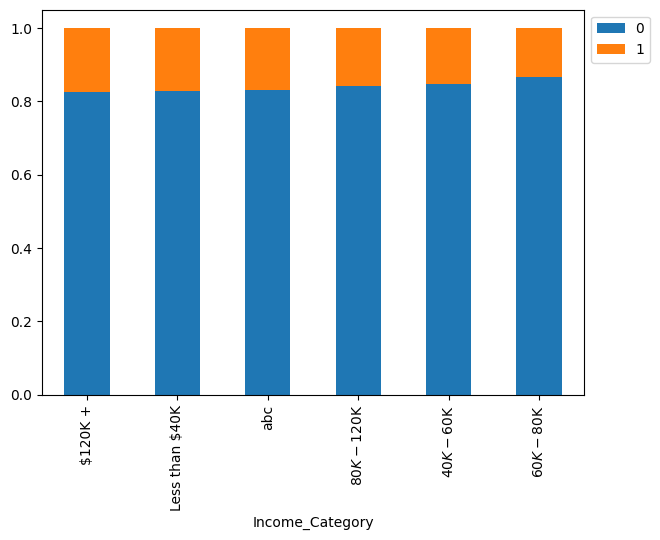

Attrition_Flag     0     1    All
Card_Category                    
All             8500  1627  10127
Blue            7917  1519   9436
Silver           473    82    555
Gold              95    21    116
Platinum          15     5     20
------------------------------------------------------------------------------------------------------------------------


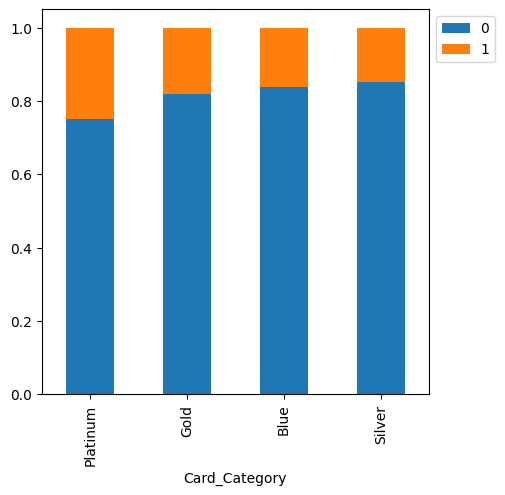

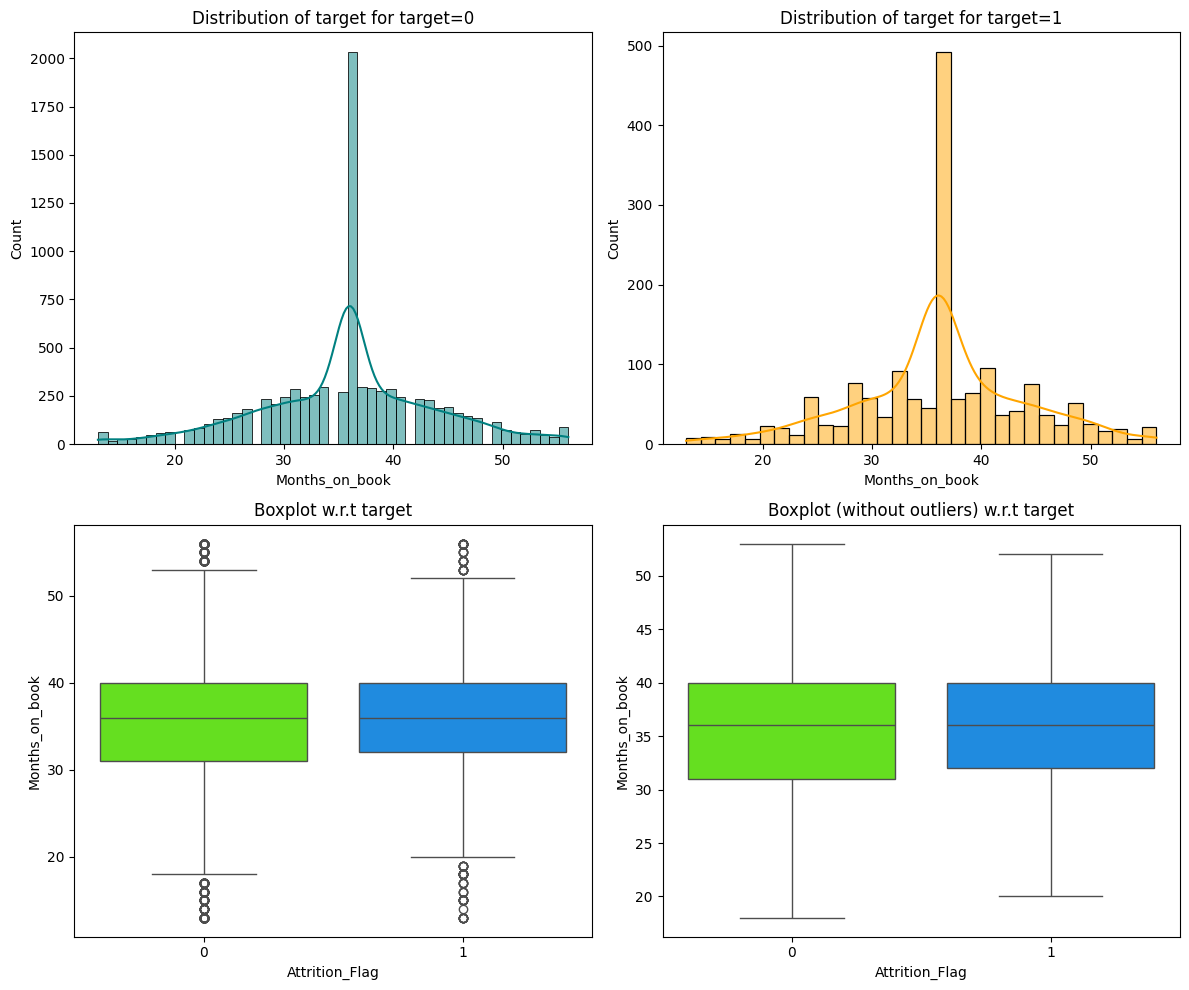

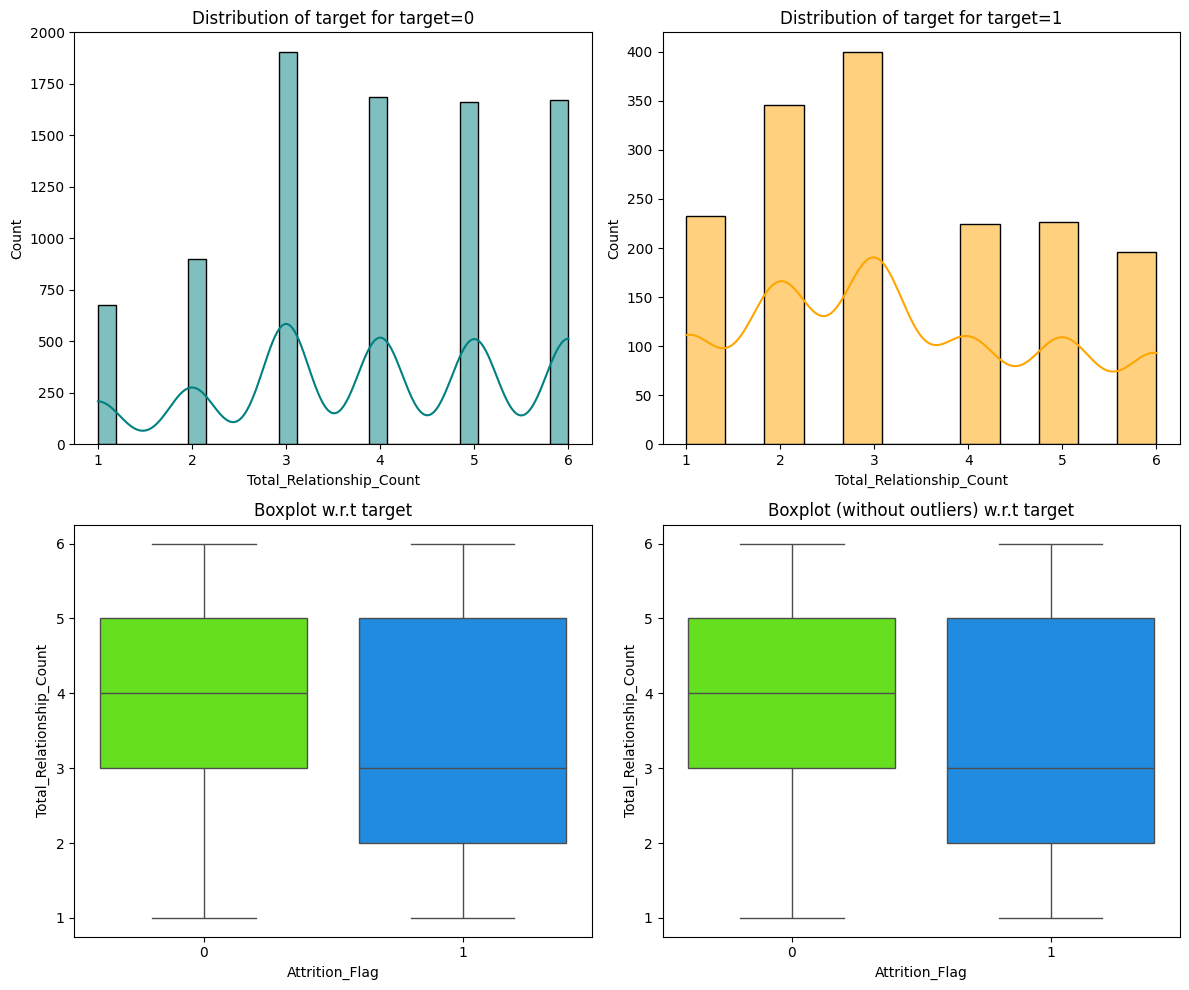

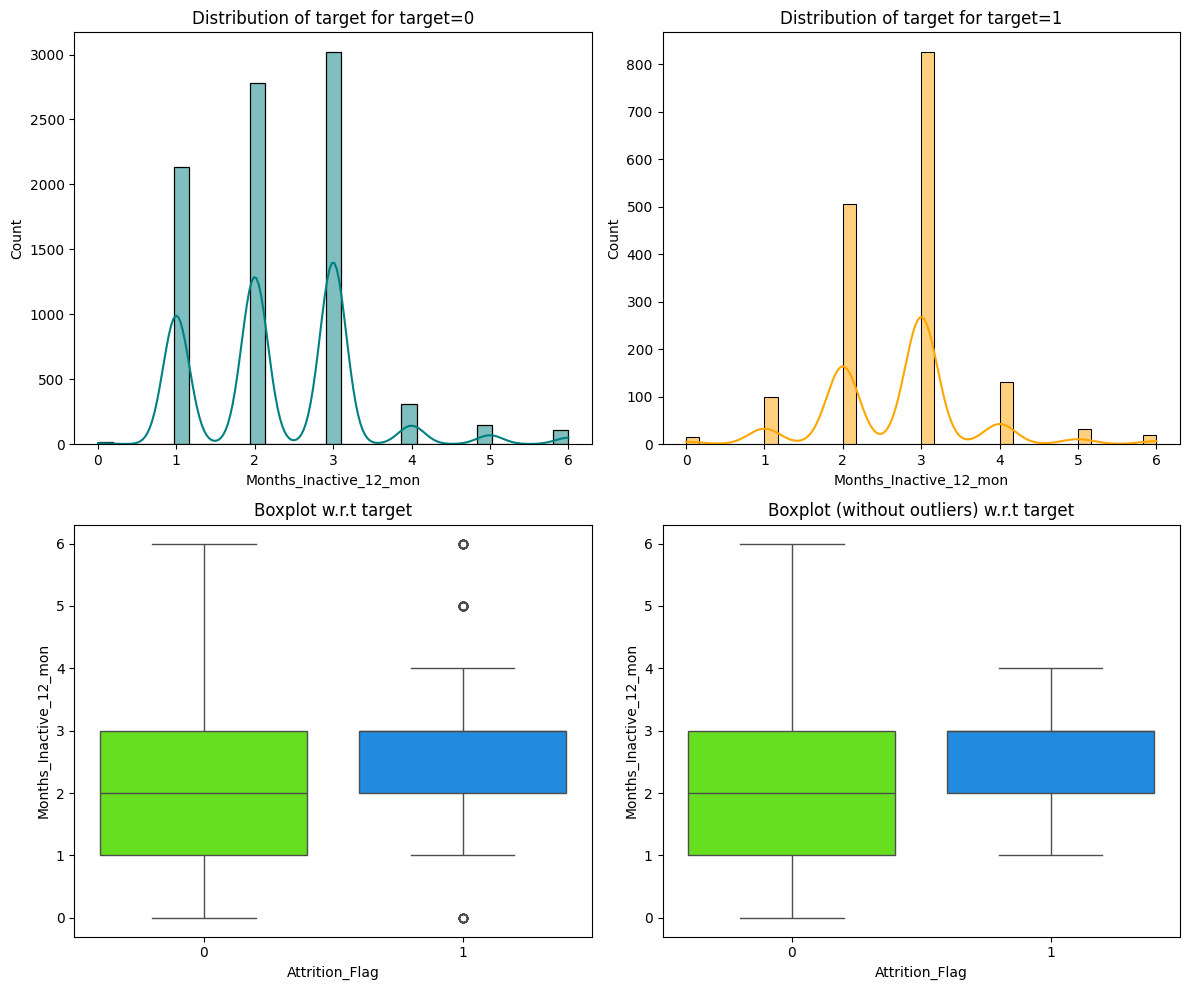

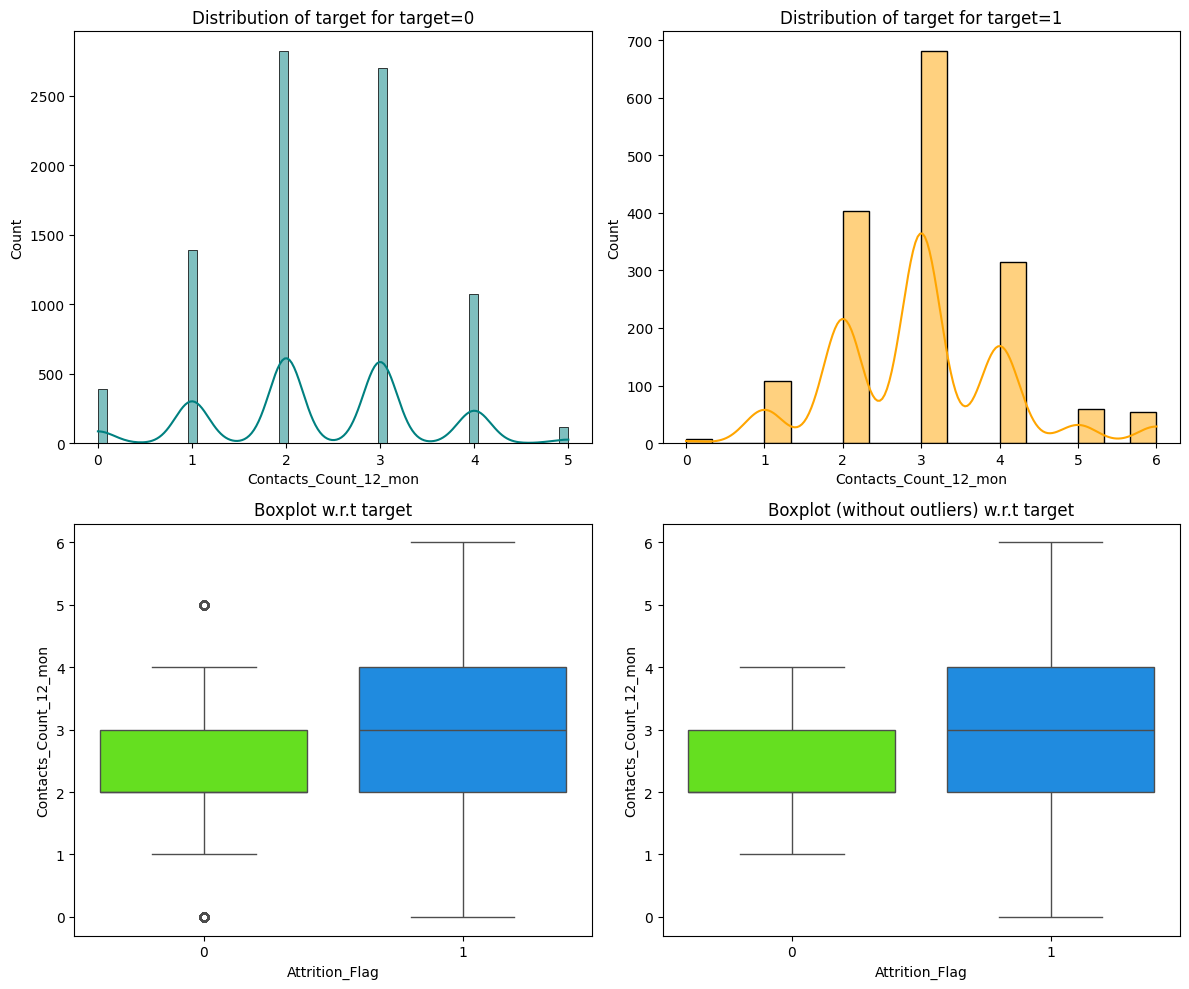

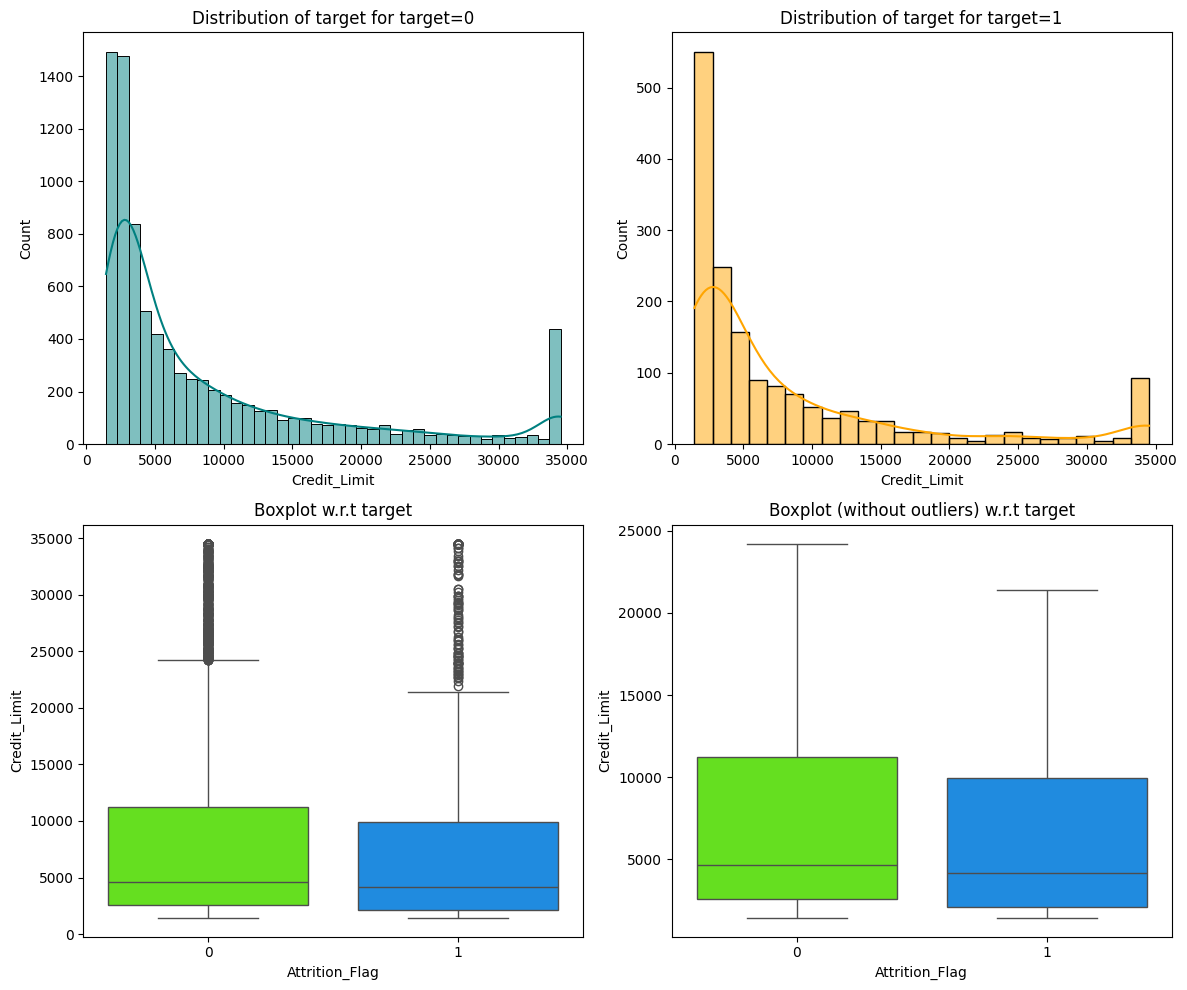

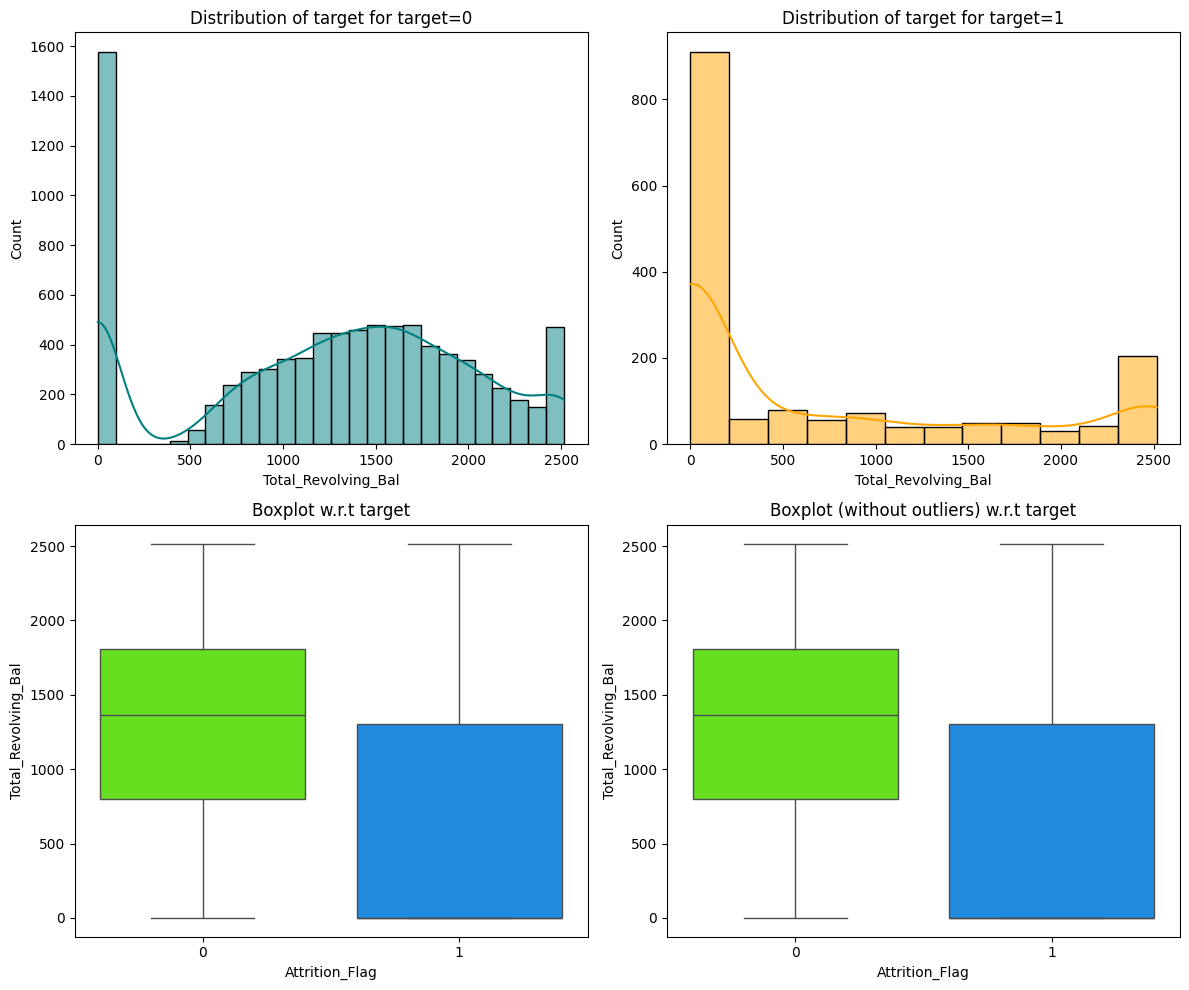

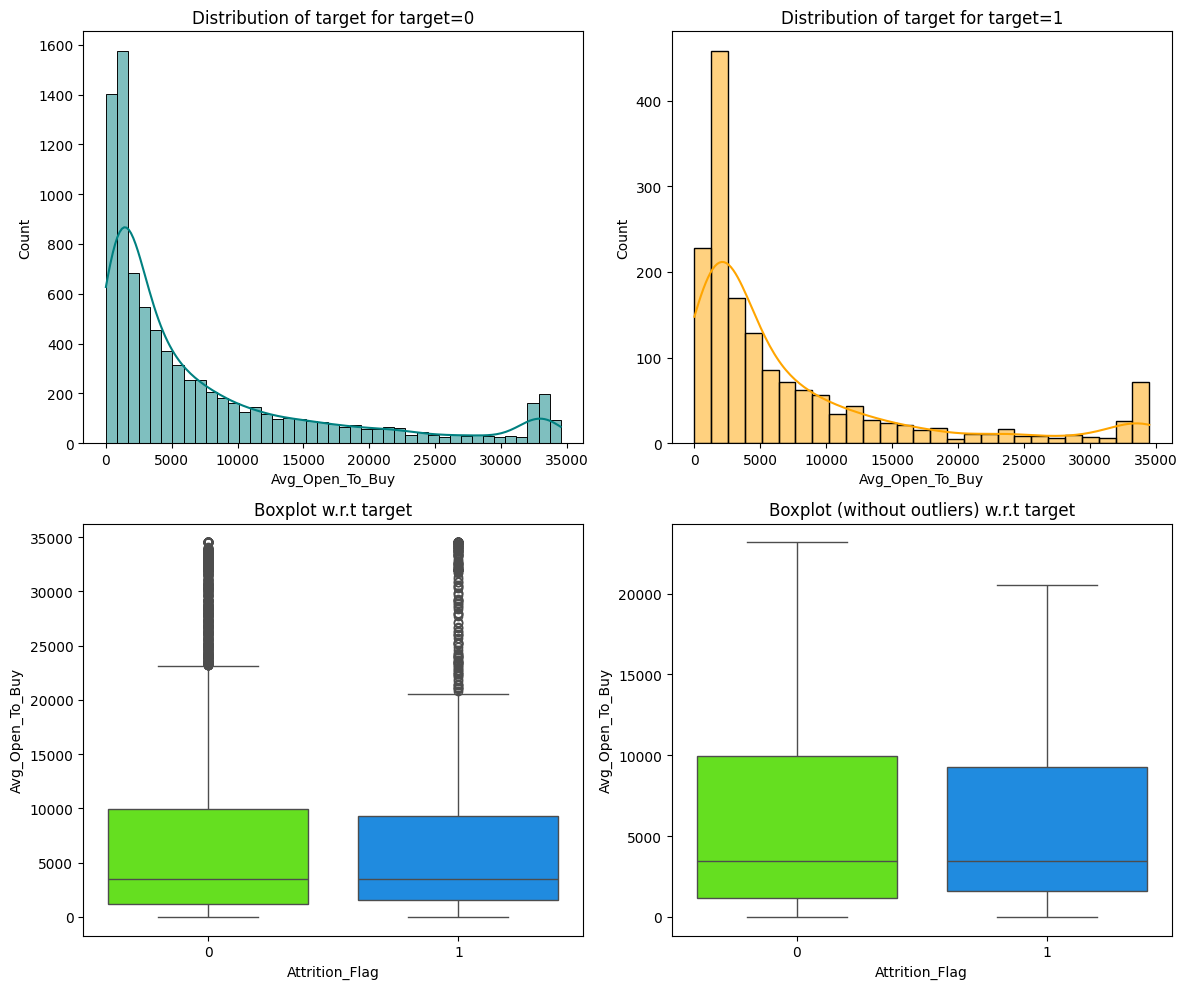

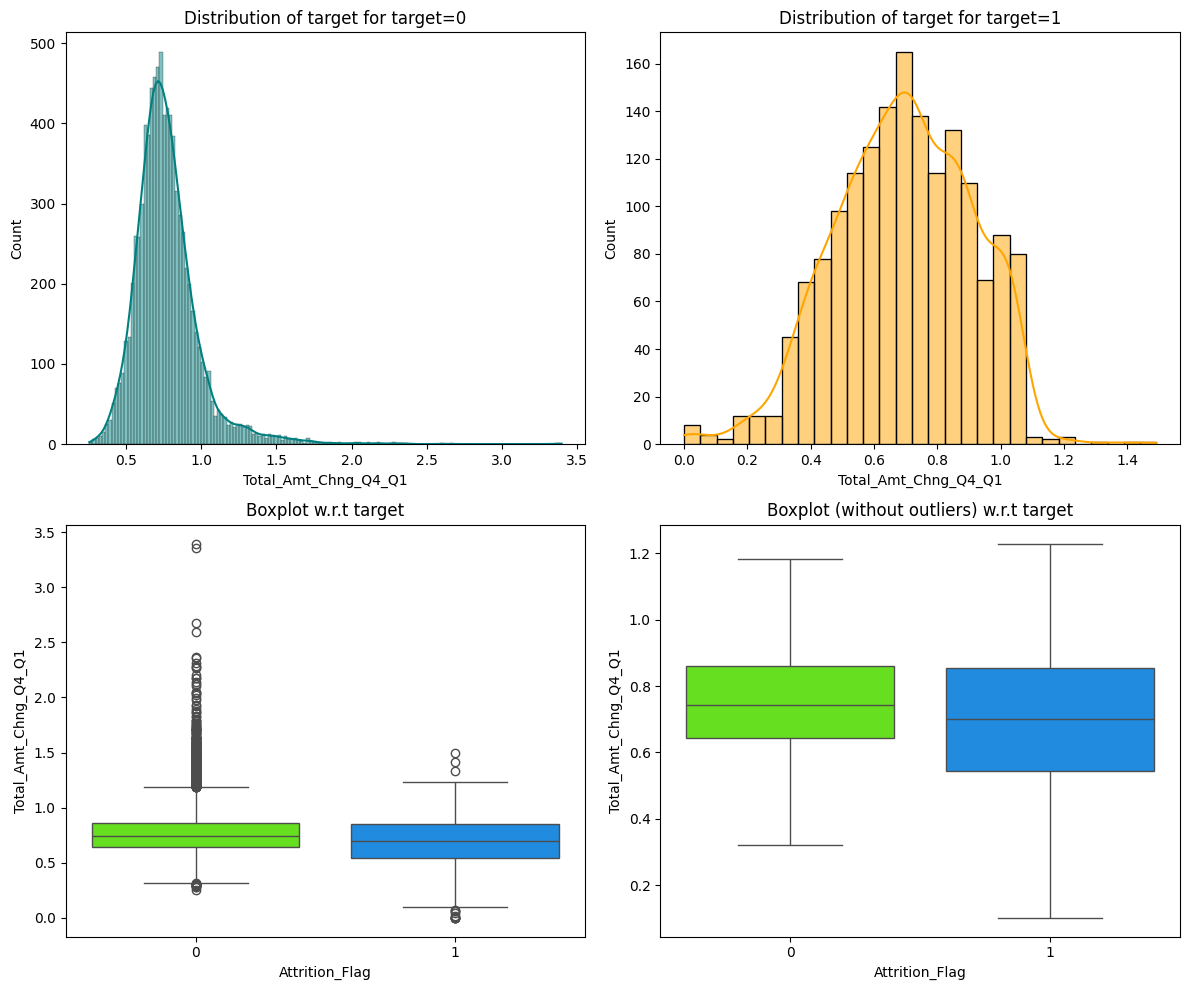

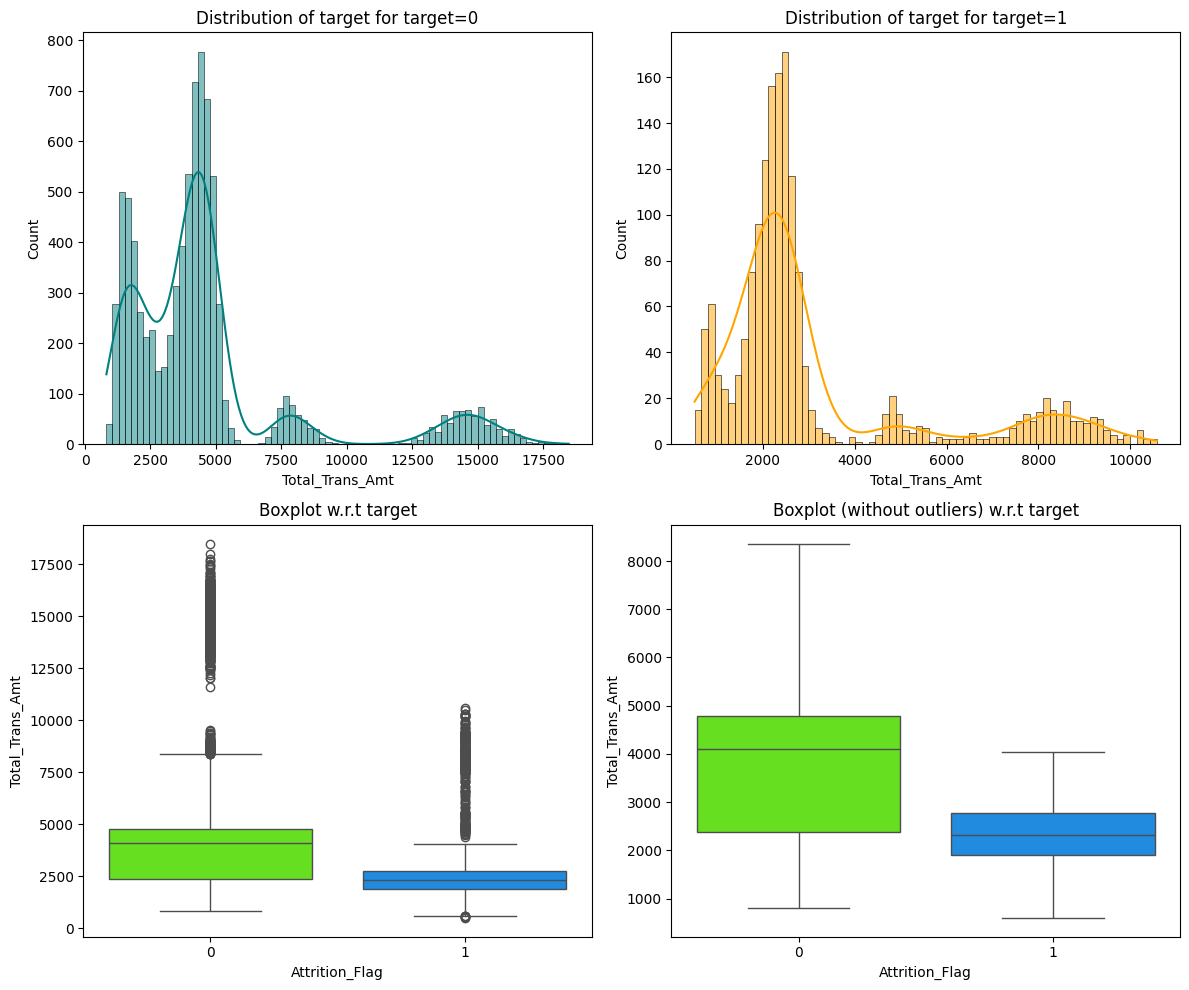

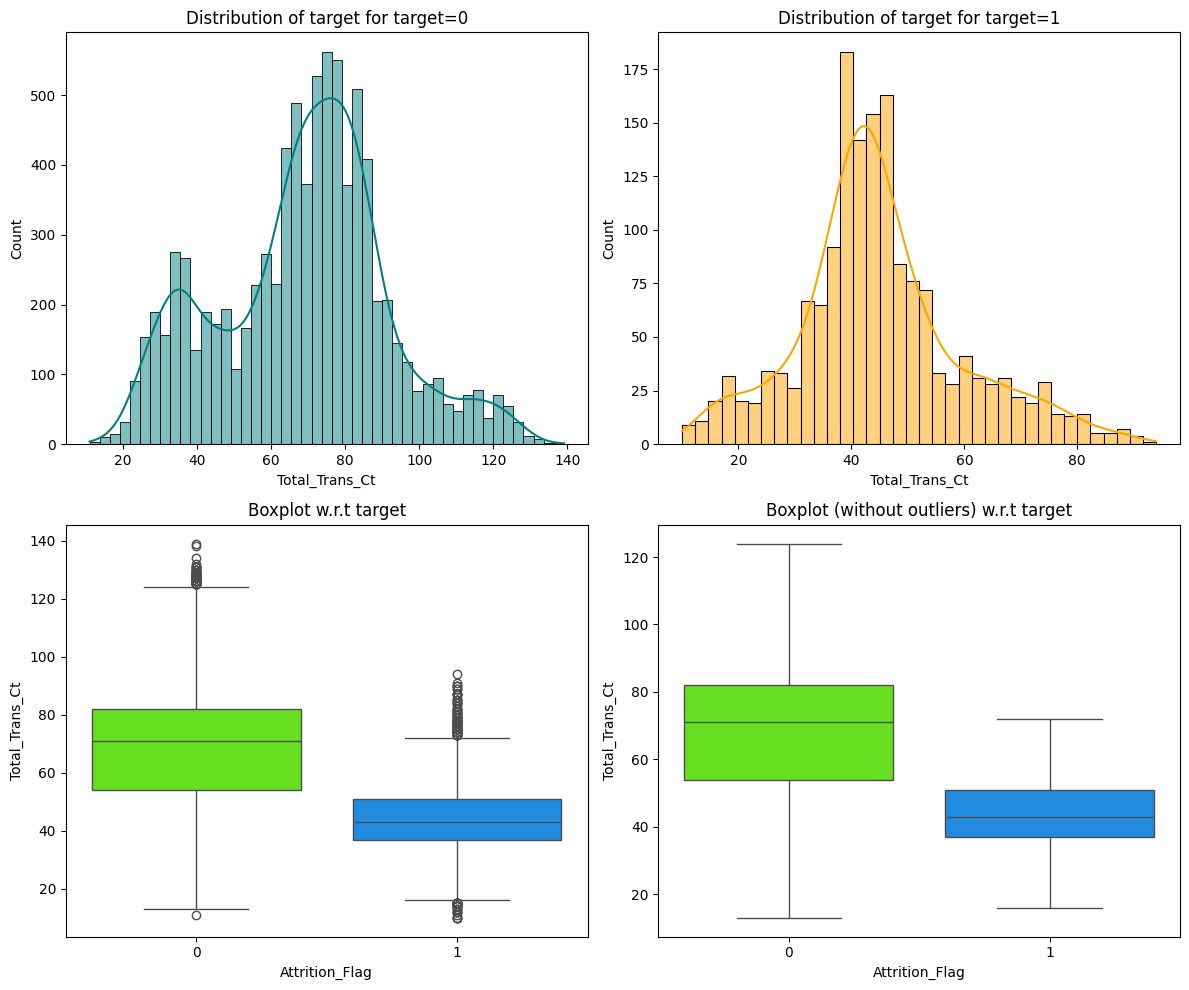

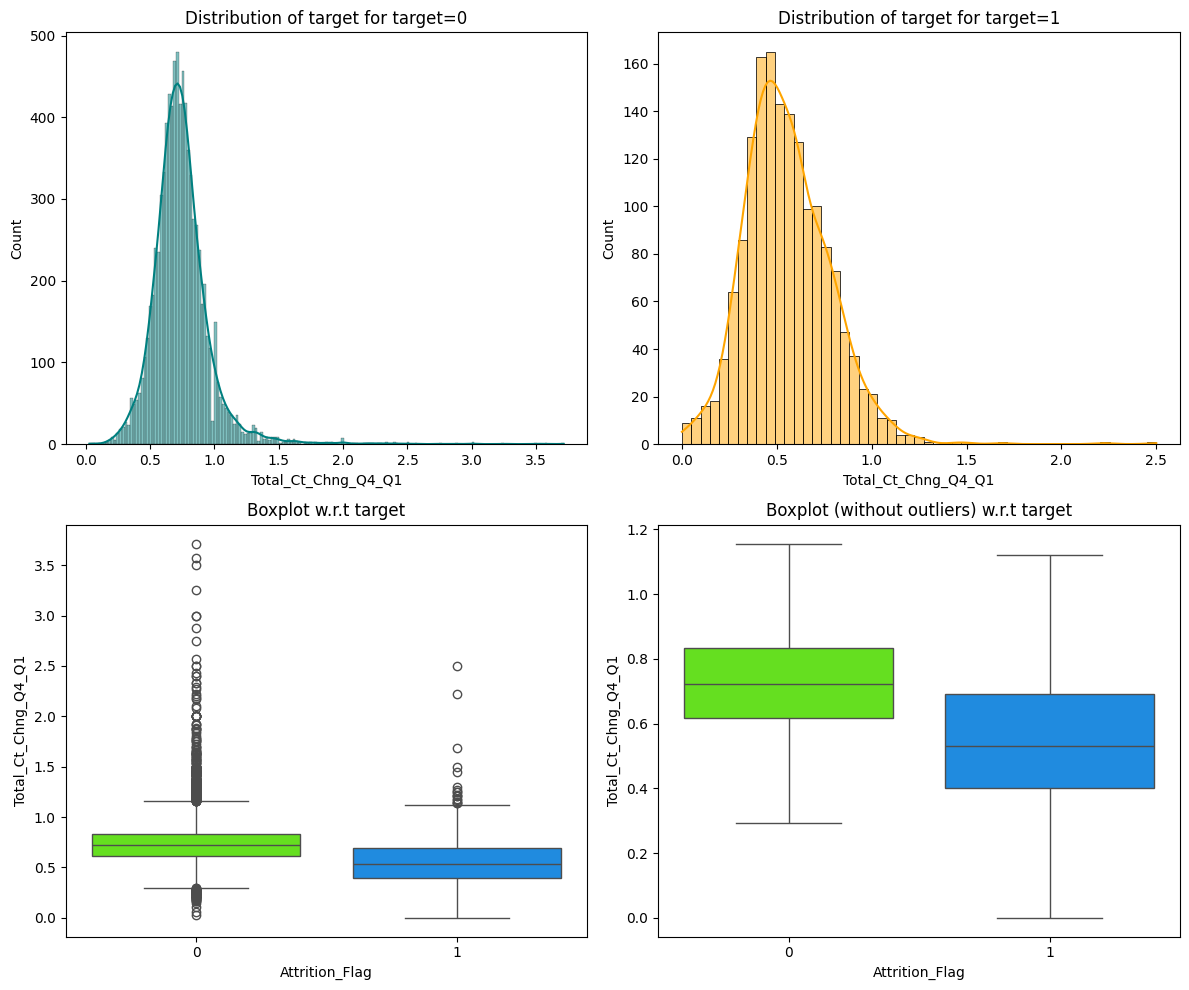

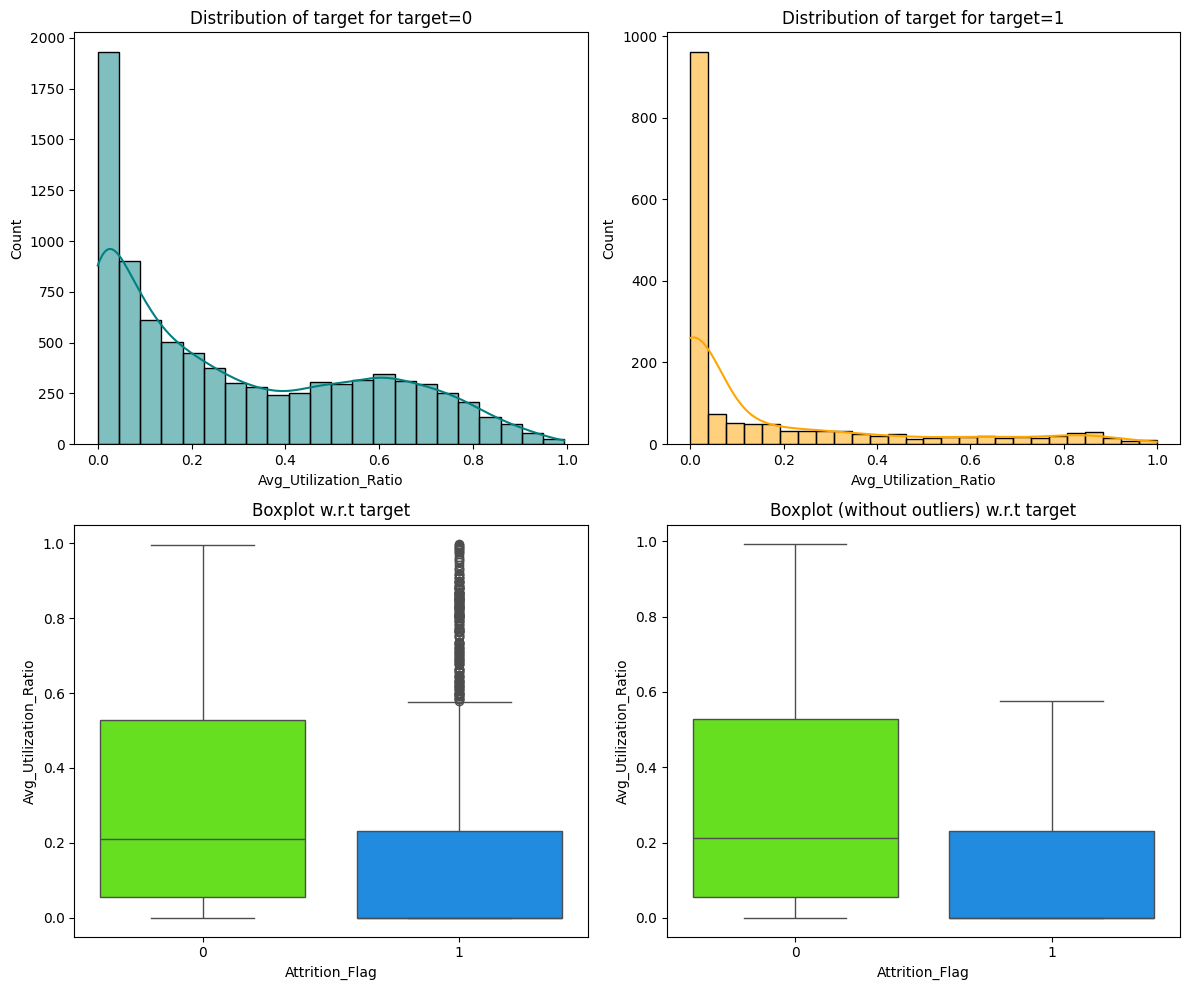

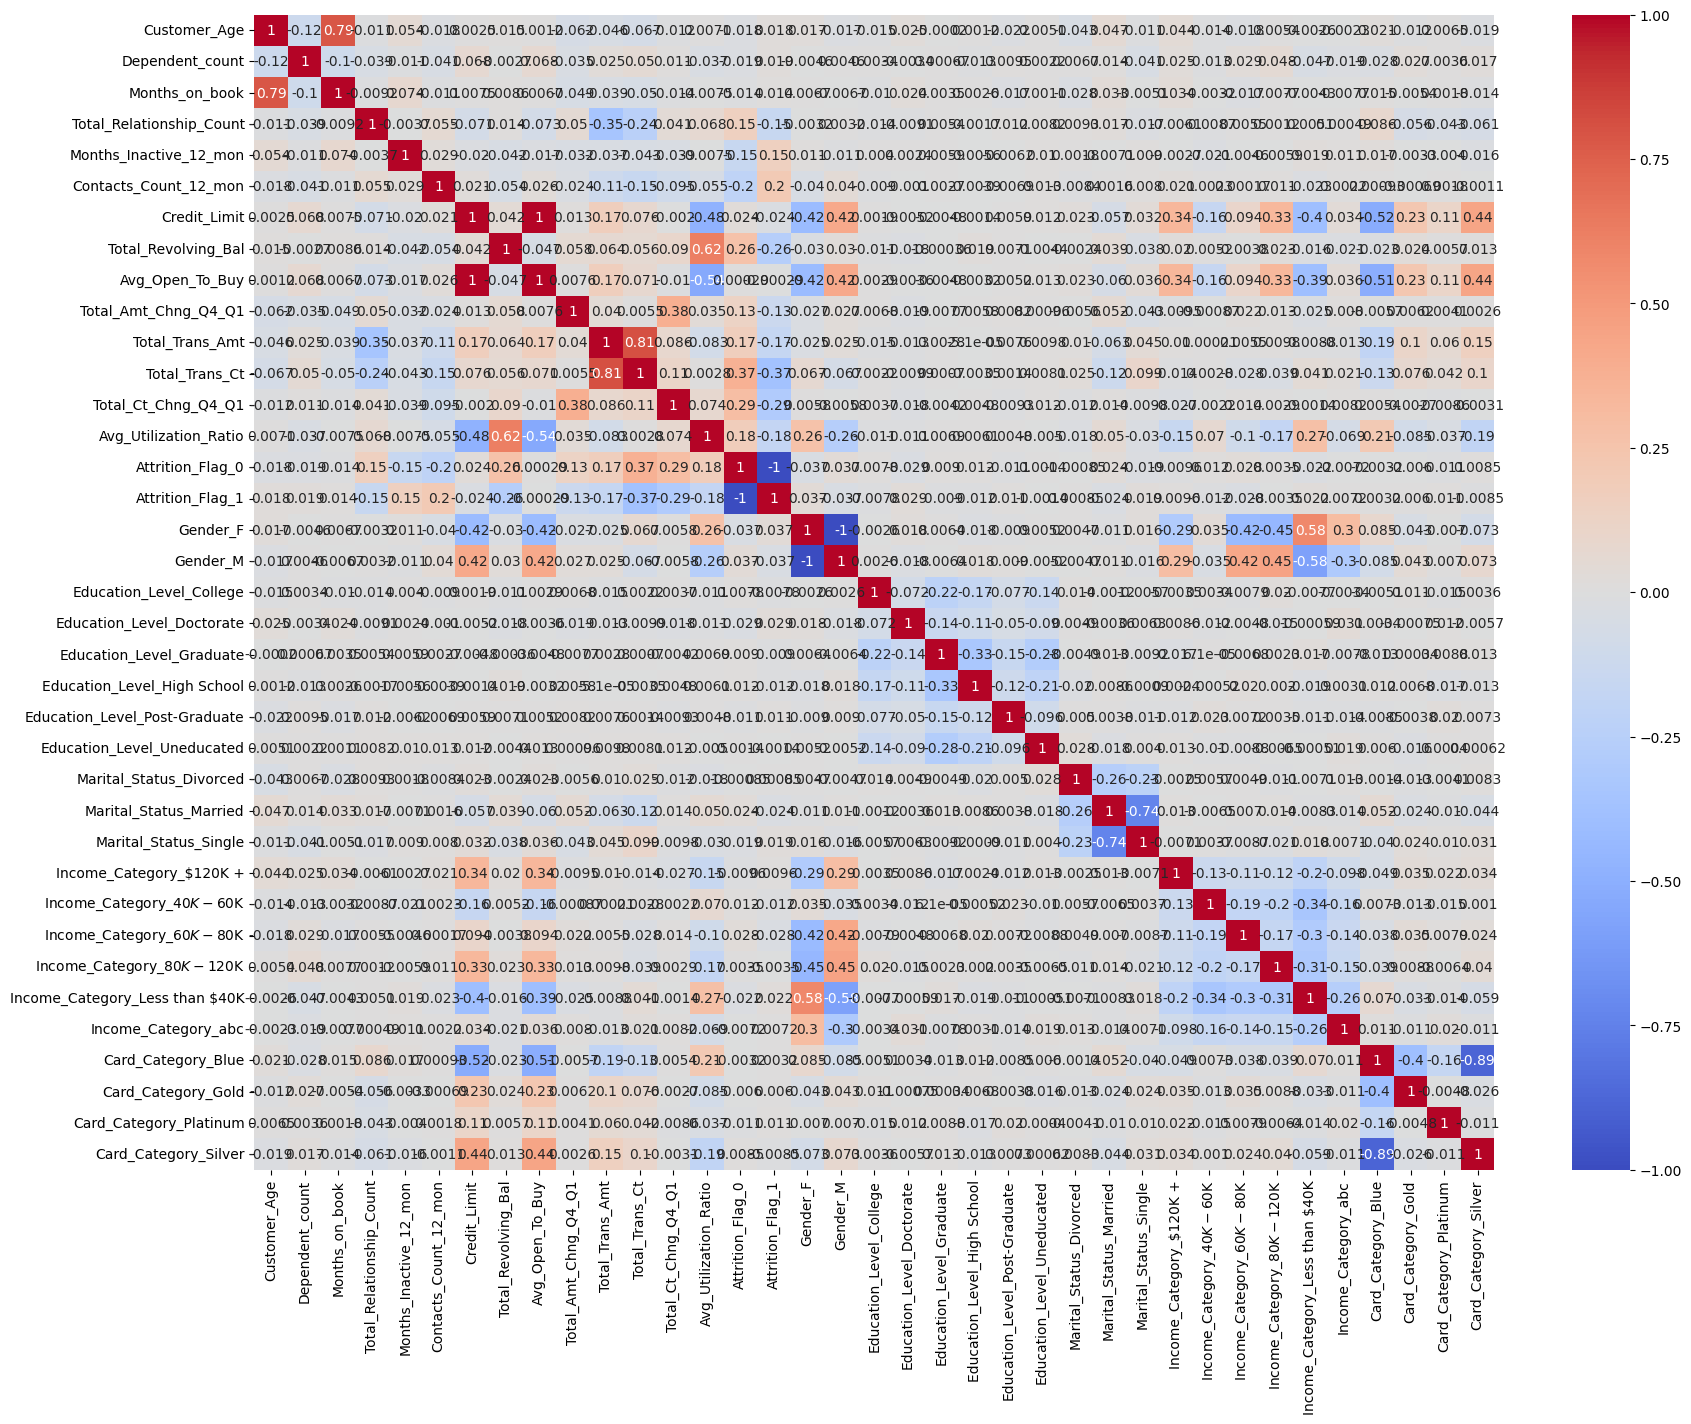

In [ ]:


# Bivariate Analysis

# 1. Attrition Flag vs. Customer Age
distribution_plot_wrt_target(data, 'Customer_Age', 'Attrition_Flag')

# 2. Attrition Flag vs. Gender
stacked_barplot(data, 'Gender', 'Attrition_Flag')

# 3. Attrition Flag vs. Education Level
stacked_barplot(data, 'Education_Level', 'Attrition_Flag')

# 4. Attrition Flag vs. Marital Status
stacked_barplot(data, 'Marital_Status', 'Attrition_Flag')

# 5. Attrition Flag vs. Income Category
stacked_barplot(data, 'Income_Category', 'Attrition_Flag')

# 6. Attrition Flag vs. Card Category
stacked_barplot(data, 'Card_Category', 'Attrition_Flag')

# 7. Attrition Flag vs. Months_on_book
distribution_plot_wrt_target(data, 'Months_on_book', 'Attrition_Flag')

# 8. Attrition Flag vs. Total_Relationship_Count
distribution_plot_wrt_target(data, 'Total_Relationship_Count', 'Attrition_Flag')

# 9. Attrition Flag vs. Months_Inactive_12_mon
distribution_plot_wrt_target(data, 'Months_Inactive_12_mon', 'Attrition_Flag')

# 10. Attrition Flag vs. Contacts_Count_12_mon
distribution_plot_wrt_target(data, 'Contacts_Count_12_mon', 'Attrition_Flag')

# 11. Attrition Flag vs. Credit_Limit
distribution_plot_wrt_target(data, 'Credit_Limit', 'Attrition_Flag')

# 12. Attrition Flag vs. Total_Revolving_Bal
distribution_plot_wrt_target(data, 'Total_Revolving_Bal', 'Attrition_Flag')

# 13. Attrition Flag vs. Avg_Open_To_Buy
distribution_plot_wrt_target(data, 'Avg_Open_To_Buy', 'Attrition_Flag')

# 14. Attrition Flag vs. Total_Amt_Chng_Q4_Q1
distribution_plot_wrt_target(data, 'Total_Amt_Chng_Q4_Q1', 'Attrition_Flag')

# 15. Attrition Flag vs. Total_Trans_Amt
distribution_plot_wrt_target(data, 'Total_Trans_Amt', 'Attrition_Flag')

# 16. Attrition Flag vs. Total_Trans_Ct
distribution_plot_wrt_target(data, 'Total_Trans_Ct', 'Attrition_Flag')

# 17. Attrition Flag vs. Total_Ct_Chng_Q4_Q1
distribution_plot_wrt_target(data, 'Total_Ct_Chng_Q4_Q1', 'Attrition_Flag')

# 18. Attrition Flag vs. Avg_Utilization_Ratio
distribution_plot_wrt_target(data, 'Avg_Utilization_Ratio', 'Attrition_Flag')

# Convert categorical columns to numerical using one-hot encoding
data = pd.get_dummies(data, columns=['Attrition_Flag', 'Gender',
                                   'Education_Level', 'Marital_Status',
                                   'Income_Category', 'Card_Category'])

# Correlation Matrix
plt.figure(figsize=(20, 15))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.show()

In [ ]:
# Insights from Bivariate Analysis:


# 1. Attrition Flag vs. Customer Age:
#   - Customers with a higher age are more likely to churn.

# 2. Attrition Flag vs. Gender:
#   - Females are slightly more likely to churn than males.

# 3. Attrition Flag vs. Education Level:
#   - Customers with a doctorate degree are less likely to churn.

# 4. Attrition Flag vs. Marital Status:
#   - Single and divorced customers are more likely to churn than married customers.

# 5. Attrition Flag vs. Income Category:
#   - Customers in the "Less than $40K" income category have a higher churn rate compared to others.

# 6. Attrition Flag vs. Card Category:
#   - Customers with a Blue card have a higher churn rate compared to Platinum and others.

# 7. Attrition Flag vs. Months_on_book:
#   - Customers with less time on book are more likely to churn.

# 8. Attrition Flag vs. Total_Relationship_Count:
#   - Customers with fewer product relationships are more likely to churn.

# 9. Attrition Flag vs. Months_Inactive_12_mon:
#   - Customers with more months of inactivity during the last 12 months have a higher likelihood of churn.

# 10. Attrition Flag vs. Contacts_Count_12_mon:
#   - A higher number of contacts during the last 12 months can indicate a potential issue that might lead to churn.

# 11. Attrition Flag vs. Credit_Limit:
#   - Customers with lower credit limits may be more prone to churn.

# 12. Attrition Flag vs. Total_Revolving_Bal:
#   - Higher revolving balance might be associated with a higher churn rate.

# 13. Attrition Flag vs. Avg_Open_To_Buy:
#   - Customers with a lower average open to buy may be more likely to churn.

# 14. Attrition Flag vs. Total_Amt_Chng_Q4_Q1:
#   - A significant decrease in transaction amount can be a factor influencing churn.

# 15. Attrition Flag vs. Total_Trans_Amt:
#   - Customers with lower total transaction amounts are more likely to churn.

# 16. Attrition Flag vs. Total_Trans_Ct:
#   - Customers with fewer transactions are more likely to churn.

# 17. Attrition Flag vs. Total_Ct_Chng_Q4_Q1:
#   - A significant change in transaction count can be indicative of churn.

# 18. Attrition Flag vs. Avg_Utilization_Ratio:
#   - A higher average utilization ratio can be a predictor of churn.



# Correlation Matrix:
#   - Provides insights into the relationships between different features.
#   - There are strong correlations among some features, including:
#     - 'Total_Revolving_Bal' and 'Total_Trans_Amt'.
#     - 'Credit_Limit' and 'Avg_Open_To_Buy'.
#   - Correlation does not imply causation, but it can help identify potential relationships between variables.


## Data Pre-processing

In [ ]:
Q1 = data.quantile(0.25)  # To find the 25th percentile
Q3 = data.quantile(0.75)  # To find the 75th percentile

IQR = Q3 - Q1  # Inter Quantile Range (75th perentile - 25th percentile)

# Finding lower and upper bounds for all values. All values outside these bounds are outliers
lower = (Q1 - 1.5 * IQR)
upper = (Q3 + 1.5 * IQR)

In [ ]:
# checking the % outliers
((data.select_dtypes(include=["float64", "int64"]) < lower) | (data.select_dtypes(include=["float64", "int64"]) > upper)).sum() / len(data) * 100

,0
Customer_Age,0.020
Dependent_count,0.000
Months_on_book,3.812
Total_Relationship_Count,0.000
Months_Inactive_12_mon,3.268
Contacts_Count_12_mon,6.211
Credit_Limit,9.717
Total_Revolving_Bal,0.000
Avg_Open_To_Buy,9.509
Total_Amt_Chng_Q4_Q1,3.910


# Train Test Split

In [ ]:
#Creating a copy of data
data1 = data.copy()

In [ ]:
# replace the anomalous values with NaN
data1.loc[data1['Customer_Age'] < lower['Customer_Age'], 'Customer_Age'] = np.nan
data1.loc[data1['Customer_Age'] > upper['Customer_Age'], 'Customer_Age'] = np.nan


In [ ]:
data1.isna().sum()

,0
CLIENTNUM,0
Attrition_Flag,0
Customer_Age,2
Gender,0
Dependent_count,0
Education_Level,1519
Marital_Status,749
Income_Category,0
Card_Category,0
Months_on_book,0


In [ ]:
data1.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45.000,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.000,777,11914.000,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49.000,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.000,864,7392.000,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51.000,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.000,0,3418.000,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40.000,F,4,High School,NaN,Less than $40K,Blue,34,3,4,1,3313.000,2517,796.000,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40.000,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.000,0,4716.000,2.175,816,28,2.500,0.000


In [ ]:
# creating an instace of the imputer to be used
imputer = SimpleImputer(strategy="most_frequent")


In [ ]:
#Dividing the data train into X and Y
X = data1.drop('Attrition_Flag', axis=1)
y = data1['Attrition_Flag']

In [ ]:
# Splitting data into training and validation set:
X_train,X_temp,y_train,y_temp = train_test_split(X,y,test_size=0.4,random_state=1)
X_test,X_val,y_test,y_val = train_test_split(X_temp,y_temp,test_size=0.5,random_state=1)
print(X_train.shape,X_val.shape,X_test.shape)

(6076, 20) (2026, 20) (2025, 20)


## Missing value imputation




In [ ]:
reqd_col_for_impute = ["Education_Level", "Marital_Status", "Income_Category"]

In [ ]:
# Fit and transform the train data
X_train[reqd_col_for_impute] = imputer.fit_transform(X_train[reqd_col_for_impute])
# Transform the validation data
X_val[reqd_col_for_impute] = imputer.transform(X_val[reqd_col_for_impute])
# Transform the test data
X_test[reqd_col_for_impute] = imputer.transform(X_test[reqd_col_for_impute])

In [ ]:
# Checking that no column has missing values in train or test sets
print(X_train.isna().sum())
print("-" * 30)
print(X_val.isna().sum())
print("-" * 30)
print(X_test.isna().sum())

CLIENTNUM                         0
Customer_Age                      0
Dependent_count                   0
Months_on_book                    0
Total_Relationship_Count          0
Months_Inactive_12_mon            0
Contacts_Count_12_mon             0
Credit_Limit                      0
Total_Revolving_Bal               0
Avg_Open_To_Buy                   0
Total_Amt_Chng_Q4_Q1              0
Total_Trans_Amt                   0
Total_Trans_Ct                    0
Total_Ct_Chng_Q4_Q1               0
Avg_Utilization_Ratio             0
Gender_M                          0
Education_Level_Doctorate         0
Education_Level_Graduate          0
Education_Level_High School       0
Education_Level_Post-Graduate     0
Education_Level_Uneducated        0
Marital_Status_Married            0
Marital_Status_Single             0
Income_Category_$40K - $60K       0
Income_Category_$60K - $80K       0
Income_Category_$80K - $120K      0
Income_Category_Less than $40K    0
Income_Category_abc         

In [ ]:

#Calculate the mean of 'Customer_Age' in the training set
mean_customer_age = X_train['Customer_Age'].mean()

# Fill missing values in 'Customer_Age' for train, validation and test sets with the calculated mean
X_train['Customer_Age'].fillna(mean_customer_age, inplace=True)
X_val['Customer_Age'].fillna(mean_customer_age, inplace=True)
X_test['Customer_Age'].fillna(mean_customer_age, inplace=True)

# Check if there are still any missing values in 'Customer_Age'
print(X_train['Customer_Age'].isna().sum())
print(X_val['Customer_Age'].isna().sum())
print(X_test['Customer_Age'].isna().sum())


0
0
0


In [ ]:
cols = X_train.select_dtypes(include=["object", "category"])
for i in cols.columns:
    print(X_train[i].value_counts())
    print("*" * 30)

Gender
F    3244
M    2832
Name: count, dtype: int64
******************************
Education_Level
Graduate         2773
High School      1206
Uneducated        906
College           622
Post-Graduate     310
Doctorate         259
Name: count, dtype: int64
******************************
Marital_Status
Married     3286
Single      2330
Divorced     460
Name: count, dtype: int64
******************************
Income_Category
Less than $40K    2147
$40K - $60K       1073
$80K - $120K       907
$60K - $80K        834
abc                679
$120K +            436
Name: count, dtype: int64
******************************
Card_Category
Blue        5655
Silver       340
Gold          68
Platinum      13
Name: count, dtype: int64
******************************


In [ ]:
cols = X_val.select_dtypes(include=["object", "category"])
for i in cols.columns:
    print(X_val[i].value_counts())
    print("*" * 30)

Gender
F    1043
M     983
Name: count, dtype: int64
******************************
Education_Level
Graduate         937
High School      377
Uneducated       305
College          194
Post-Graduate    116
Doctorate         97
Name: count, dtype: int64
******************************
Marital_Status
Married     1072
Single       819
Divorced     135
Name: count, dtype: int64
******************************
Income_Category
Less than $40K    688
$40K - $60K       375
$80K - $120K      319
$60K - $80K       280
abc               218
$120K +           146
Name: count, dtype: int64
******************************
Card_Category
Blue        1885
Silver       109
Gold          27
Platinum       5
Name: count, dtype: int64
******************************


In [ ]:
cols = X_test.select_dtypes(include=["object", "category"])
for i in cols.columns:
    print(X_train[i].value_counts())
    print("*" * 30)

Gender
F    3244
M    2832
Name: count, dtype: int64
******************************
Education_Level
Graduate         2773
High School      1206
Uneducated        906
College           622
Post-Graduate     310
Doctorate         259
Name: count, dtype: int64
******************************
Marital_Status
Married     3286
Single      2330
Divorced     460
Name: count, dtype: int64
******************************
Income_Category
Less than $40K    2147
$40K - $60K       1073
$80K - $120K       907
$60K - $80K        834
abc                679
$120K +            436
Name: count, dtype: int64
******************************
Card_Category
Blue        5655
Silver       340
Gold          68
Platinum      13
Name: count, dtype: int64
******************************


# categorical variables

In [ ]:
X_train = pd.get_dummies(X_train, drop_first=True)
#impute missing values in X_val
X_val = pd.get_dummies(X_val, drop_first=True)
#impute missing values in X_test
X_test = pd.get_dummies(X_test, drop_first=True)
print(X_train.shape, X_val.shape, X_test.shape)

(6076, 31) (2026, 31) (2025, 31)


In [ ]:
# check the top 5 rows from the train dataset
X_train.head()


,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Gender_M,Education_Level_Doctorate,Education_Level_Graduate,Education_Level_High School,Education_Level_Post-Graduate,Education_Level_Uneducated,Marital_Status_Married,Marital_Status_Single,Income_Category_$40K - $60K,Income_Category_$60K - $80K,Income_Category_$80K - $120K,Income_Category_Less than $40K,Income_Category_abc,Card_Category_Gold,Card_Category_Platinum,Card_Category_Silver
9522,794692158,43.000,3,25,1,2,1,17328.000,0,17328.000,0.820,15367,105,0.641,0.000,False,False,False,True,False,False,True,False,True,False,False,False,False,False,False,True
8973,713133258,38.000,3,36,2,2,3,34516.000,2008,32508.000,0.858,8872,86,0.593,0.058,True,False,True,False,False,False,False,True,False,False,True,False,False,False,False,True
1745,771234558,65.000,0,56,6,3,2,7478.000,0,7478.000,0.847,2213,62,0.771,0.000,False,False,True,False,False,False,False,True,False,False,False,True,False,False,False,False
5896,714554808,51.000,1,40,3,3,0,2774.000,1362,1412.000,0.866,4802,91,0.685,0.491,False,False,True,False,False,False,True,False,False,False,False,True,False,False,False,False
7007,713873658,45.000,4,37,4,3,3,2701.000,1986,715.000,0.538,4767,76,0.854,0.735,True,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False


## Model Building

### Model evaluation criterion

The nature of predictions made by the classification model will translate as follows:

- True positives (TP) are failures correctly predicted by the model.
- False negatives (FN) are real failures in a generator where there is no detection by model.
- False positives (FP) are failure detections in a generator where there is no failure.

**Which metric to optimize?**

* We need to choose the metric which will ensure that the maximum number of generator failures are predicted correctly by the model.
* We would want Recall to be maximized as greater the Recall, the higher the chances of minimizing false negatives.
* We want to minimize false negatives because if a model predicts that a machine will have no failure when there will be a failure, it will increase the maintenance cost.

**Let's define a function to output different metrics (including recall) on the train and test set and a function to show confusion matrix so that we do not have to use the same code repetitively while evaluating models.**

In [ ]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Accuracy": acc,
            "Recall": recall,
            "Precision": precision,
            "F1": f1

        },
        index=[0],
    )

    return df_perf


Training Performance:

Bagging: 0.9928425357873211
Random forest: 1.0
AdaBoost: 0.8742331288343558
Gradient Boosting: 0.9008179959100204
Decision Tree: 1.0

Validation Performance:

Bagging: 0.853125
Random forest: 0.759375
AdaBoost: 0.83125
Gradient Boosting: 0.81875
Decision Tree: 0.76875


In [ ]:
#creating a confusion matrix
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")
    plt.title("Confusion Matrix")
    plt.show()

### Model Building with original data

Sample code for model building with original data

In [ ]:
#defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred, pos_label='Attrited Customer')  # to compute Recall, set pos_label to one of the valid labels
    precision = precision_score(target, pred, pos_label='Attrited Customer')  # to compute Precision, set pos_label to one of the valid labels
    f1 = f1_score(target, pred, pos_label='Attrited Customer')  # to compute F1-score, set pos_label to one of the valid labels

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Accuracy": acc,
            "Recall": recall,
            "Precision": precision,
            "F1": f1

        },
        index=[0],
    )

    return df_perf


#creating a confusion matrix
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")
    plt.title("Confusion Matrix")
    plt.show()


models = []  # Empty list to store all the models

# Appending models into the list
models.append(("Bagging", BaggingClassifier(random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1)))

# Complete the code to append remaining 3 models in the list models
models.append(("AdaBoost", AdaBoostClassifier(random_state=1)))
models.append(("Gradient Boosting", GradientBoostingClassifier(random_state=1)))
models.append(("Decision Tree", DecisionTreeClassifier(random_state=1)))


print("\n" "Training Performance:" "\n")
for name, model in models:
    model.fit(X_train, y_train)
    scores = recall_score(y_train, model.predict(X_train), pos_label='Attrited Customer') # set pos_label to one of the valid labels
    print("{}: {}".format(name, scores))

print("\n" "Validation Performance:" "\n")

# Impute missing values in X_val
imputer = SimpleImputer(strategy='mean') # Replace 'mean' with other strategies if necessary
X_val_imputed = imputer.fit_transform(X_val)

for name, model in models:
    model.fit(X_train, y_train)
    scores_val = recall_score(y_val, model.predict(X_val_imputed), pos_label='Attrited Customer') # set pos_label to one of the valid labels
    print("{}: {}".format(name, scores_val))


Training Performance:

Bagging: 0.9928425357873211
Random forest: 1.0
AdaBoost: 0.8742331288343558
Gradient Boosting: 0.9008179959100204
Decision Tree: 1.0

Validation Performance:

Bagging: 0.853125
Random forest: 0.759375
AdaBoost: 0.83125
Gradient Boosting: 0.81875
Decision Tree: 0.76875


### Model Building with Oversampled data


In [ ]:
#print("Before Oversampling, counts of label 'Yes': {}".format(sum(y_train == 1)))
print("Before Oversampling, counts of label 'No': {} \n".format(sum(y_train == 0)))

sm = SMOTE(
    sampling_strategy=1, k_neighbors=5, random_state=1
)  # Synthetic Minority Over Sampling Technique
X_train_over, y_train_over = sm.fit_resample(X_train, y_train)


print("After Oversampling, counts of label 'Yes': {}".format(sum(y_train_over == 1)))
print("After Oversampling, counts of label 'No': {} \n".format(sum(y_train_over == 0)))


print("After Oversampling, the shape of train_X: {}".format(X_train_over.shape))
print("After Oversampling, the shape of train_y: {} \n".format(y_train_over.shape))

Before Oversampling, counts of label 'No': 0 

After Oversampling, counts of label 'Yes': 0
After Oversampling, counts of label 'No': 0 

After Oversampling, the shape of train_X: (10196, 31)
After Oversampling, the shape of train_y: (10196,) 



In [ ]:
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("Bagging", BaggingClassifier(random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1)))

# Complete the code to append remaining 3 models in the list models
models.append(("AdaBoost", AdaBoostClassifier(random_state=1)))
models.append(("Gradient Boosting", GradientBoostingClassifier(random_state=1)))
models.append(("Decision Tree", DecisionTreeClassifier(random_state=1)))

print("\n" "Training Performance:" "\n")
for name, model in models:
    model.fit(X_train_over, y_train_over)
    scores = recall_score(y_train_over, model.predict(X_train_over), pos_label='Attrited Customer')  # Use 'Attrited Customer' as pos_label
    print("{}: {}".format(name, scores))

print("\n" "Validation Performance:" "\n")

for name, model in models:
    model.fit(X_train_over, y_train_over)
    scores = recall_score(y_val, model.predict(X_val), pos_label='Attrited Customer') # Use 'Attrited Customer' as pos_label
    print("{}: {}".format(name, scores))


Training Performance:

Bagging: 0.9996076892899176
Random forest: 1.0
AdaBoost: 0.9641035700274617
Gradient Boosting: 0.9739113377795214
Decision Tree: 1.0

Validation Performance:

Bagging: 0.88125
Random forest: 0.878125
AdaBoost: 0.878125
Gradient Boosting: 0.88125
Decision Tree: 0.8125


### Model Building with Undersampled data

In [ ]:
# Random undersampler for under sampling the data
rus = RandomUnderSampler(random_state=1, sampling_strategy=1)
X_train_un, y_train_un = rus.fit_resample(X_train, y_train)
print("Before Under Sampling, counts of label 'Yes': {}".format(sum(y_train == 1)))
print("Before Under Sampling, counts of label 'No': {} \n".format(sum(y_train == 0)))

print("After Under Sampling, counts of label 'Yes': {}".format(sum(y_train_un == 1)))
print("After Under Sampling, counts of label 'No': {} \n".format(sum(y_train_un == 0)))

print("After Under Sampling, the shape of train_X: {}".format(X_train_un.shape))
print("After Under Sampling, the shape of train_y: {} \n".format(y_train_un.shape))

Before Under Sampling, counts of label 'Yes': 0
Before Under Sampling, counts of label 'No': 0 

After Under Sampling, counts of label 'Yes': 0
After Under Sampling, counts of label 'No': 0 

After Under Sampling, the shape of train_X: (1956, 31)
After Under Sampling, the shape of train_y: (1956,) 



In [ ]:
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("Bagging", BaggingClassifier(random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1)))

# Complete the code to append remaining 3 models in the list models
models.append(("AdaBoost", AdaBoostClassifier(random_state=1)))
models.append(("Gradient Boosting", GradientBoostingClassifier(random_state=1)))
models.append(("Decision Tree", DecisionTreeClassifier(random_state=1)))

print("\n" "Training Performance:" "\n")
for name, model in models:
    model.fit(X_train_un, y_train_un)
    scores = recall_score(y_train_un, model.predict(X_train_un), pos_label='Attrited Customer')  # Calculate recall score using undersampled data and set pos_label
    print("{}: {}".format(name, scores))

print("\n" "Validation Performance:" "\n")

for name, model in models:
    model.fit(X_train_un, y_train_un)
    scores = recall_score(y_val, model.predict(X_val), pos_label='Attrited Customer') # Use 'Attrited Customer' as pos_label
    print("{}: {}".format(name, scores))


Training Performance:

Bagging: 0.9969325153374233
Random forest: 1.0
AdaBoost: 0.9621676891615542
Gradient Boosting: 0.9867075664621677
Decision Tree: 1.0

Validation Performance:

Bagging: 0.9375
Random forest: 0.9375
AdaBoost: 0.93125
Gradient Boosting: 0.95
Decision Tree: 0.884375


### HyperparameterTuning

#### Sample Parameter Grids

**Note**

1. Sample parameter grids have been provided to do necessary hyperparameter tuning. These sample grids are expected to provide a balance between model performance improvement and execution time. One can extend/reduce the parameter grid based on execution time and system configuration.
  - Please note that if the parameter grid is extended to improve the model performance further, the execution time will increase


- For Gradient Boosting:

```
param_grid = {
    "init": [AdaBoostClassifier(random_state=1),DecisionTreeClassifier(random_state=1)],
    "n_estimators": np.arange(50,110,25),
    "learning_rate": [0.01,0.1,0.05],
    "subsample":[0.7,0.9],
    "max_features":[0.5,0.7,1],
}
```

- For Adaboost:

```
param_grid = {
    "n_estimators": np.arange(50,110,25),
    "learning_rate": [0.01,0.1,0.05],
    "base_estimator": [
        DecisionTreeClassifier(max_depth=2, random_state=1),
        DecisionTreeClassifier(max_depth=3, random_state=1),
    ],
}
```

- For Bagging Classifier:

```
param_grid = {
    'max_samples': [0.8,0.9,1],
    'max_features': [0.7,0.8,0.9],
    'n_estimators' : [30,50,70],
}
```
- For Random Forest:

```
param_grid = {
    "n_estimators": [50,110,25],
    "min_samples_leaf": np.arange(1, 4),
    "max_features": [np.arange(0.3, 0.6, 0.1),'sqrt'],
    "max_samples": np.arange(0.4, 0.7, 0.1)
}
```

- For Decision Trees:

```
param_grid = {
    'max_depth': np.arange(2,6),
    'min_samples_leaf': [1, 4, 7],
    'max_leaf_nodes' : [10, 15],
    'min_impurity_decrease': [0.0001,0.001]
}
```

- For XGBoost (optional):

```
param_grid={'n_estimators':np.arange(50,110,25),
            'scale_pos_weight':[1,2,5],
            'learning_rate':[0.01,0.1,0.05],
            'gamma':[1,3],
            'subsample':[0.7,0.9]
}
```

#### Sample tuning method for Decision tree with original data

In [ ]:
# defining model
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
import numpy as np
from sklearn.metrics import make_scorer, accuracy_score # import make_scorer and accuracy_score


Model = DecisionTreeClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {'max_depth': np.arange(2,6),
              'min_samples_leaf': [1, 4, 7],
              'max_leaf_nodes' : [10,15],
              'min_impurity_decrease': [0.0001,0.001] }

# Define the scorer using make_scorer
scorer = make_scorer(accuracy_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=10, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train,y_train)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'min_samples_leaf': 7, 'min_impurity_decrease': 0.0001, 'max_leaf_nodes': 15, 'max_depth': 5} with CV score=0.9313689896036388:


#### Sample tuning method for Decision tree with oversampled data

In [ ]:
# defining model
Model = DecisionTreeClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {'max_depth': np.arange(2,6),
              'min_samples_leaf': [1, 4, 7],
              'max_leaf_nodes' : [10,15],
              'min_impurity_decrease': [0.0001,0.001] }

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=10, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_over,y_train_over)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'min_samples_leaf': 7, 'min_impurity_decrease': 0.0001, 'max_leaf_nodes': 15, 'max_depth': 5} with CV score=0.907318081720182:


#### Sample tuning method for Decision tree with undersampled data

In [ ]:
# defining model
Model = DecisionTreeClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {'max_depth': np.arange(2,6),
              'min_samples_leaf': [1, 4, 7],
              'max_leaf_nodes' : [10,15],
              'min_impurity_decrease': [0.0001,0.001] }

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=10, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_un,y_train_un)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'min_samples_leaf': 7, 'min_impurity_decrease': 0.0001, 'max_leaf_nodes': 15, 'max_depth': 5} with CV score=0.9043804478313063:


## Model Comparison and Final Model Selection

In [ ]:

# Let's store the validation performance of each model in a dictionary
model_performance = {}

for name, model in models:
    y_pred_val = model.predict(X_val)
    recall = recall_score(y_val, y_pred_val, pos_label='Attrited Customer')
    precision = precision_score(y_val, y_pred_val, pos_label='Attrited Customer')
    f1 = f1_score(y_val, y_pred_val, pos_label='Attrited Customer')
    accuracy = accuracy_score(y_val, y_pred_val)
    model_performance[name] = {'Recall': recall, 'Precision': precision, 'F1': f1, 'Accuracy': accuracy}

# Create a DataFrame from the model performance dictionary for better visualization
df_performance = pd.DataFrame(model_performance).T

# Print the DataFrame
print(df_performance)

# Select the best model based on the chosen metric (e.g., highest recall)
best_model_name = df_performance['Recall'].idxmax()
best_model = [model for name, model in models if name == best_model_name][0]
print(f"\nBest model based on Recall: {best_model_name}")


# You can also consider other metrics like F1-score or precision depending on your needs.

# Final model selection:
# Based on the analysis above, the model with the highest Recall on the validation set is chosen as the final model.
final_model = best_model

# You can now proceed with further evaluation, prediction, or deployment using the final_model.


                   Recall  Precision    F1  Accuracy
Bagging             0.938      0.622 0.748     0.900
Random forest       0.938      0.682 0.789     0.921
AdaBoost            0.931      0.679 0.785     0.920
Gradient Boosting   0.950      0.689 0.799     0.924
Decision Tree       0.884      0.611 0.723     0.893

Best model based on Recall: Gradient Boosting


### Test set final performance

Test Set Performance for Gradient Boosting:
Recall: 0.9483282674772037
Precision: 0.7428571428571429
F1-Score: 0.8331108144192257
Accuracy: 0.9382716049382716


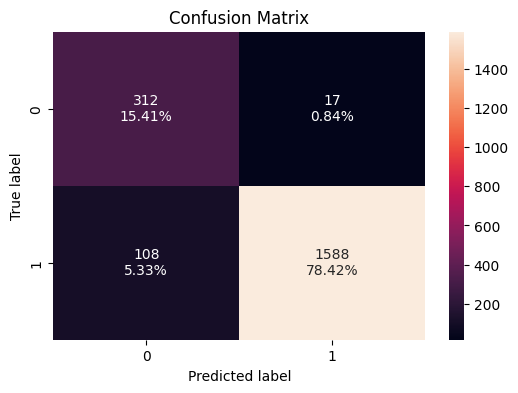

In [ ]:

y_pred_test = final_model.predict(X_test)

# Calculate the performance metrics on the test set
recall_test = recall_score(y_test, y_pred_test, pos_label='Attrited Customer')
precision_test = precision_score(y_test, y_pred_test, pos_label='Attrited Customer')
f1_test = f1_score(y_test, y_pred_test, pos_label='Attrited Customer')
accuracy_test = accuracy_score(y_test, y_pred_test)

# Print the performance metrics on the test set
print(f"Test Set Performance for {best_model_name}:")
print(f"Recall: {recall_test}")
print(f"Precision: {precision_test}")
print(f"F1-Score: {f1_test}")
print(f"Accuracy: {accuracy_test}")


# You can also plot a confusion matrix for the test set
confusion_matrix_sklearn(final_model, X_test, y_test)


# Business Insights and Conclusions

In [ ]:

# Get predictions for the test set
y_pred_test = final_model.predict(X_test)

# Create a DataFrame with actual and predicted values
results_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_test})

# Analyze the predictions to identify patterns and insights

# 1. Customer Churn Rate Prediction:
#   - Calculate the predicted churn rate by averaging the predicted churn probability.
#   - Compare the predicted churn rate with the historical churn rate to see if the model is accurately predicting churn.
#   - Analyze if there is a difference between the predicted churn rate for different customer segments.


predicted_churn_rate = results_df['Predicted'].value_counts(normalize=True)['Attrited Customer']
print(f"Predicted Churn Rate: {predicted_churn_rate:.2%}")

# 2. Identify Key Factors Contributing to Churn:
#   - Use feature importance from the model (if applicable) to identify the most important factors that are contributing to customer churn.
#   - For example, if 'Total_Trans_Amt' or 'Total_Relationship_Count' have high feature importance, we can infer these are likely factors influencing churn.
#   - You can also analyze if these factors are related to customer segments.


# 3. Identify Customers at Risk of Churn:
#   - The model can be used to identify customers who are at high risk of churn based on their characteristics.
#   - This can be done by selecting customers with a high probability of churn.
#   - You can use the `predict_proba()` method of your model to get the probability of churn for each customer.

if hasattr(final_model, 'feature_importances_'):
    feature_importances = pd.DataFrame({'Feature': X_test.columns, 'Importance': final_model.feature_importances_})
    feature_importances = feature_importances.sort_values('Importance', ascending=False)
    print("\nFeature Importance:")
    print(feature_importances)


# 4. Customer Segmentation:
#   - Segment customers based on their predicted churn probability and identify patterns within each segment.
#   - Example: Customers with high predicted churn probabilities may have lower 'Total_Trans_Ct' or lower 'Customer_Age' values.

# 5. Develop Targeted Retention Strategies:
#   - Based on the identified factors and customer segments, develop targeted retention strategies to reduce churn.
#   - Example: Offer loyalty programs or incentives to customers at high risk of churn.
#   - You can use the prediction results to determine which customer segment benefits most from specific strategies.


# 6. Evaluate the effectiveness of retention strategies:
#   - Use the model to monitor the effectiveness of implemented retention strategies.
#   - For example, if the predicted churn probability for a specific segment decreases after applying retention strategies, it can be a positive indicator.



In [ ]:


# Get predictions for the test set
y_pred_test = final_model.predict(X_test)

# Create a DataFrame with actual and predicted values
results_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_test})

# Analyze the predictions to identify patterns and insights

# 1. Customer Churn Rate Prediction:
#   - Calculate the predicted churn rate by averaging the predicted churn probability.
#   - Compare the predicted churn rate with the historical churn rate to see if the model is accurately predicting churn.
#   - Analyze if there is a difference between the predicted churn rate for different customer segments.


predicted_churn_rate = results_df['Predicted'].value_counts(normalize=True)['Attrited Customer']
print(f"Predicted Churn Rate: {predicted_churn_rate:.2%}")

# 2. Identify Key Factors Contributing to Churn:
#   - Use feature importance from the model (if applicable) to identify the most important factors that are contributing to customer churn.
#   - For example, if 'Total_Trans_Amt' or 'Total_Relationship_Count' have high feature importance, we can infer these are likely factors influencing churn.
#   - You can also analyze if these factors are related to customer segments.


# 3. Identify Customers at Risk of Churn:
#   - The model can be used to identify customers who are at high risk of churn based on their characteristics.
#   - This can be done by selecting customers with a high probability of churn.
#   - You can use the `predict_proba()` method of your model to get the probability of churn for each customer.

if hasattr(final_model, 'feature_importances_'):
    feature_importances = pd.DataFrame({'Feature': X_test.columns, 'Importance': final_model.feature_importances_})
    feature_importances = feature_importances.sort_values('Importance', ascending=False)
    print("\nFeature Importance:")
    print(feature_importances)


# 4. Customer Segmentation:
#   - Segment customers based on their predicted churn probability and identify patterns within each segment.
#   - Example: Customers with high predicted churn probabilities may have lower 'Total_Trans_Ct' or lower 'Customer_Age' values.

# 5. Develop Targeted Retention Strategies:
#   - Based on the identified factors and customer segments, develop targeted retention strategies to reduce churn.
#   - Example: Offer loyalty programs or incentives to customers at high risk of churn.
#   - You can use the prediction results to determine which customer segment benefits most from specific strategies.


# 6. Evaluate the effectiveness of retention strategies:
#   - Use the model to monitor the effectiveness of implemented retention strategies.
#   - For example, if the predicted churn probability for a specific segment decreases after applying retention strategies, it can be a positive indicator.

# Recommendation based on the best model
# Based on the analysis above, you can recommend the following:
print("\nRecommendation:")
print("1. Focus on improving customer satisfaction and engagement for customers with low Total_Trans_Ct and Total_Relationship_Count")
print("2. Target customers at high risk of churn with tailored retention strategies, such as personalized offers, loyalty programs or exclusive benefits.")
print("3. Monitor the effectiveness of retention strategies and adjust them as needed based on model predictions.")


***